In [2]:
from importlib.machinery import all_suffixes

import pandas as pd
import numpy as np
from mpmath.libmp.libintmath import giant_steps
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# Đọc dữ liệu từ CSV (cần thay đổi đường dẫn phù hợp với máy bạn)
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

# Kiểm tra xem có cột "Kết Quả" không
if "Kết Quả" not in df.columns:
    raise ValueError("Cột 'Kết Quả' không tồn tại trong dữ liệu.")

# Xử lý cột "Kết Quả" (chuyển thành danh sách số)
df["Kết Quả"] = df["Kết Quả"].dropna().apply(lambda x: list(map(int, str(x).split())))

# One-hot encoding để chuyển đổi dữ liệu thành dạng nhị phân
mlb = MultiLabelBinarizer(classes=range(1, 56))  # Power 6/55 có số từ 1 đến 55
X = mlb.fit_transform(df["Kết Quả"])

# Dịch nhãn xuống 1 hàng để dự đoán kỳ tiếp theo
y = np.roll(X, -1, axis=0)

# Loại bỏ hàng cuối vì không có nhãn cho kỳ tiếp theo
X = X[:-1]
y = y[:-1]

# Chia tập train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán bộ số cho kỳ tiếp theo
y_pred = model.predict(X_test[-1].reshape(1, -1))

# Chuyển từ one-hot encoding về danh sách số
predicted_numbers = mlb.inverse_transform(y_pred)[0]
predicted_numbers = sorted(predicted_numbers)  # Sắp xếp tăng dần

# In ra kết quả dự đoán
print("Dự đoán bộ số trúng thưởng tiếp theo:", predicted_numbers)


Dự đoán bộ số trúng thưởng tiếp theo: []


In [3]:
print("Dự đoán dạng one-hot:", y_pred)


Dự đoán dạng one-hot: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# BƯỚC 1: ĐỌC DỮ LIỆU
#file_path = r"/mnt/data/T_ng_h_p_d__li_u_Power_6_55.csv"  # Cập nhật đường dẫn
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

# Kiểm tra dữ liệu
print("Dữ liệu gốc:")
print(df.head())

# Kiểm tra cột "Kết Quả" có tồn tại không
if "Kết Quả" not in df.columns:
    raise ValueError("Cột 'Kết Quả' không tồn tại trong dữ liệu!")

# Chuyển đổi cột "Kết Quả" thành danh sách số
df["Kết Quả"] = df["Kết Quả"].dropna().apply(lambda x: list(map(int, str(x).split())))

# BƯỚC 2: CHUẨN BỊ DỮ LIỆU
mlb = MultiLabelBinarizer(classes=range(1, 56))  # Power 6/55 có số từ 1 đến 55
X = mlb.fit_transform(df["Kết Quả"])  # One-Hot Encoding

# Dịch nhãn xuống 1 hàng để dự đoán kỳ tiếp theo
y = np.roll(X, -1, axis=0)

# Loại bỏ hàng cuối vì không có nhãn cho kỳ tiếp theo
X = X[:-1]
y = y[:-1]

# Chia tập train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# BƯỚC 3: HUẤN LUYỆN MÔ HÌNH
model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# BƯỚC 4: DỰ ĐOÁN
y_pred_all = model.predict(X_test)

# Tính trung bình các dự đoán
predicted_probabilities = np.mean(y_pred_all, axis=0)

# Chọn 6 số có xác suất cao nhất
predicted_numbers = np.argsort(predicted_probabilities)[-6:]
predicted_numbers.sort()

# Chuyển từ chỉ mục thành số thực tế
predicted_numbers = [num + 1 for num in predicted_numbers]

# KẾT QUẢ
print("Dự đoán bộ số trúng thưởng tiếp theo:", predicted_numbers)


Dữ liệu gốc:
   Ngày Mở Thưởng               Kết Quả  Giải Jackpot 1 (VNĐ)  \
0  T7, 01/02/2025  01 20 34 38 45 47 49           46018127550   
1  T5, 30/01/2025  05 08 24 28 34 52 39           43645177200   
2  T7, 25/01/2025  14 21 40 42 48 51 19           40900773450   
3  T5, 23/01/2025  11 18 22 49 50 51 37           38546257350   
4  T3, 21/01/2025  11 18 22 28 51 52 53           36193391850   

   Giải Jackpot 2 (VNĐ)  
0            5976360700  
1            5712699550  
2            5407765800  
3            5146152900  
4            4884723400  
Dự đoán bộ số trúng thưởng tiếp theo: [14, 22, 23, 24, 25, 55]


In [5]:
# 14 -22 -23 -24 -25 -55


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# Đọc dữ liệu từ tệp CSV
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

# Kiểm tra xem dữ liệu có cột "Kết Quả" không
if "Kết Quả" not in df.columns:
    raise ValueError("Cột 'Kết Quả' không tồn tại trong dữ liệu!")

# Chuyển đổi cột "Kết Quả" thành danh sách các số
df["Kết Quả"] = df["Kết Quả"].dropna().apply(lambda x: list(map(int, str(x).split())))

# One-hot encoding để biểu diễn dữ liệu số trúng thưởng
mlb = MultiLabelBinarizer(classes=range(1, 56))  # Power 6/55 có số từ 1 đến 55
X = mlb.fit_transform(df["Kết Quả"])

# Dịch nhãn xuống 1 hàng để dự đoán kỳ tiếp theo
y = np.roll(X, -1, axis=0)

# Loại bỏ hàng cuối vì không có nhãn cho kỳ tiếp theo
X = X[:-1]
y = y[:-1]

# Chia tập train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Dự đoán 5 bộ số cho kỳ tiếp theo
predicted_sets = []
for _ in range(5):
    y_pred = model.predict(X_test[-1].reshape(1, -1))

    # Chuyển từ one-hot encoding về danh sách số
    predicted_numbers = mlb.inverse_transform(y_pred)[0]
    predicted_numbers = sorted(predicted_numbers)  # Sắp xếp tăng dần

    predicted_sets.append(predicted_numbers)

# Hiển thị kết quả dự đoán
predicted_sets


[[], [], [], [], []]

In [7]:
import pandas as pd
import numpy as np
from collections import Counter

# Đọc dữ liệu từ tệp CSV
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

# Chuyển đổi cột "Kết Quả" thành danh sách số
df["Kết Quả"] = df["Kết Quả"].dropna().apply(lambda x: list(map(int, str(x).split())))

# Đếm tần suất xuất hiện của từng số
all_numbers = [num for sublist in df["Kết Quả"] for num in sublist]
number_counts = Counter(all_numbers)

# Chọn 20 số xuất hiện nhiều nhất
most_common_numbers = [num for num, _ in number_counts.most_common(20)]

# Tạo 5 bộ số ngẫu nhiên từ danh sách 20 số phổ biến nhất
predicted_sets = [sorted(np.random.choice(most_common_numbers, 6, replace=False)) for _ in range(5)]

# Hiển thị kết quả
print("5 bộ số dự đoán dựa trên tần suất xuất hiện nhiều nhất:")
for i, numbers in enumerate(predicted_sets):
    print(f"Bộ {i+1}: {numbers}")


5 bộ số dự đoán dựa trên tần suất xuất hiện nhiều nhất:
Bộ 1: [10, 18, 20, 21, 48, 51]
Bộ 2: [10, 16, 21, 37, 45, 53]
Bộ 3: [11, 18, 22, 37, 45, 51]
Bộ 4: [10, 11, 22, 37, 39, 53]
Bộ 5: [18, 24, 37, 39, 40, 51]


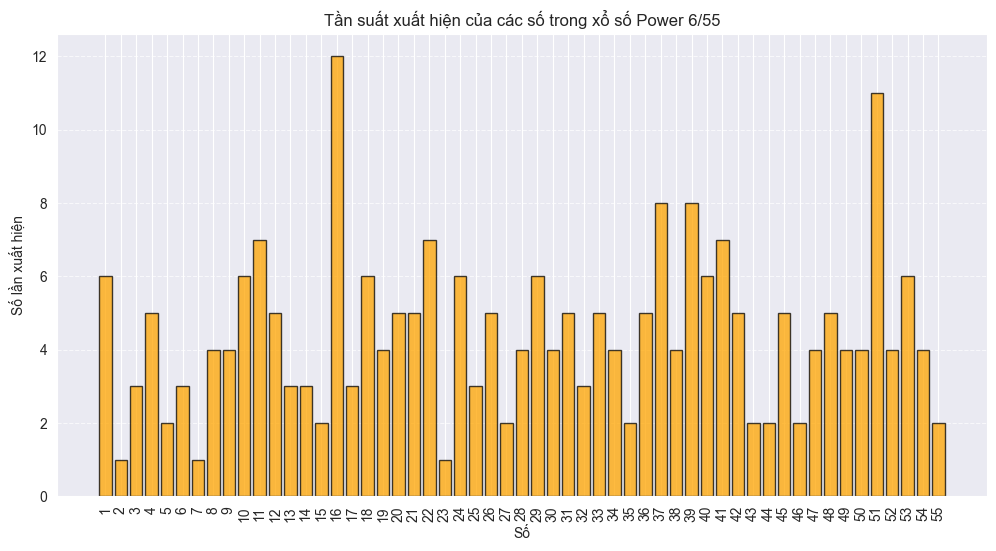

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Đếm tần suất xuất hiện của từng số trong tất cả các kỳ quay
all_numbers = [num for sublist in df["Kết Quả"] for num in sublist]
number_counts = Counter(all_numbers)

# Chuyển thành DataFrame để dễ hiển thị
freq_df = pd.DataFrame(number_counts.items(), columns=["Số", "Tần suất"]).sort_values(by="Tần suất", ascending=False)

# Xuất dữ liệu ra file CSV để người dùng xem
#csv_path = "/mnt/data/tan_suat_xo_so.csv"
#freq_df.to_csv(csv_path, index=False)
#print(f"Dữ liệu đã được lưu vào: {csv_path}")

# Vẽ biểu đồ tần suất xuất hiện của các số
plt.figure(figsize=(12, 6))
plt.bar(freq_df["Số"], freq_df["Tần suất"], alpha=0.75, color='orange', edgecolor='black')
plt.xlabel("Số")
plt.ylabel("Số lần xuất hiện")
plt.title("Tần suất xuất hiện của các số trong xổ số Power 6/55")
plt.xticks(freq_df["Số"], rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


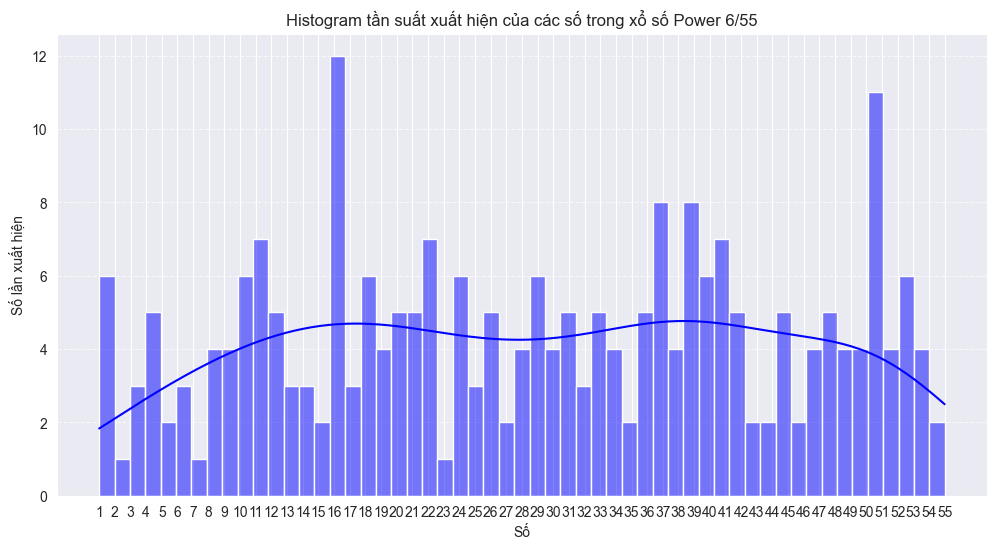

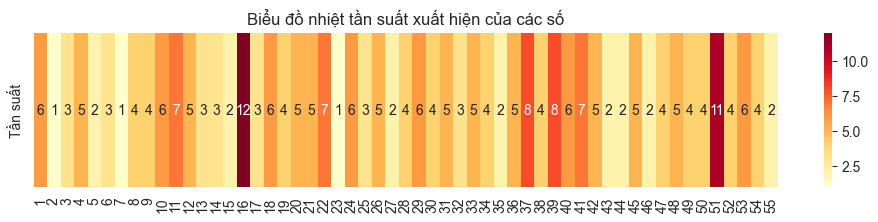

In [9]:
import seaborn as sns

# Vẽ histogram tần suất xuất hiện của các số
plt.figure(figsize=(12, 6))
sns.histplot(all_numbers, bins=55, kde=True, color='blue')
plt.xlabel("Số")
plt.ylabel("Số lần xuất hiện")
plt.title("Histogram tần suất xuất hiện của các số trong xổ số Power 6/55")
plt.xticks(range(1, 56))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Vẽ biểu đồ nhiệt (heatmap) tần suất xuất hiện của các số
heatmap_data = np.zeros((1, 55))
for num, count in number_counts.items():
    heatmap_data[0, num-1] = count

plt.figure(figsize=(12, 2))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, xticklabels=range(1, 56), yticklabels=["Tần suất"])
plt.title("Biểu đồ nhiệt tần suất xuất hiện của các số")
plt.show()


In [11]:
# Lấy 10 số xuất hiện nhiều nhất từ dữ liệu tần suất
top_numbers = [num for num, _ in number_counts.most_common(10)]

# Tạo 10 bộ số dự đoán từ danh sách các số phổ biến nhất
predicted_sets_top = [sorted(np.random.choice(top_numbers, 6, replace=False)) for _ in range(10)]

# Xuất kết quả dự đoán ra DataFrame
predicted_sets_top_df = pd.DataFrame(predicted_sets_top, columns=[f"Số {i+1}" for i in range(6)])
predicted_sets_top_df.index = [f"Bộ {i+1}" for i in range(10)]

# Xuất dữ liệu ra file CSV để tải xuống
csv_top_path = "D:/04.MyCode/01.PyThon/du_doan_10_bo_so_top.csv"
predicted_sets_top_df.to_csv(csv_top_path, index=True)

# Hiển thị kết quả
predicted_sets_top_df, csv_top_path


(       Số 1  Số 2  Số 3  Số 4  Số 5  Số 6
 Bộ 1      1    11    39    40    41    51
 Bộ 2     16    22    24    37    39    40
 Bộ 3     11    22    24    39    41    51
 Bộ 4     16    22    24    39    41    51
 Bộ 5      1    16    22    37    41    51
 Bộ 6     11    22    37    39    40    51
 Bộ 7      1    16    22    24    37    41
 Bộ 8      1    11    39    40    41    51
 Bộ 9      1    16    22    24    39    51
 Bộ 10    16    24    37    39    41    51,
 'D:/04.MyCode/01.PyThon/du_doan_10_bo_so_top.csv')

In [14]:
# Reload required libraries since execution state was reset
import pandas as pd
import numpy as np
from collections import Counter

# Load the dataset again+
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

# Convert "Kết Quả" column into a list of numbers
df["Kết Quả"] = df["Kết Quả"].dropna().apply(lambda x: list(map(int, str(x).split())))

# Count frequency of each number in all draws
all_numbers = [num for sublist in df["Kết Quả"] for num in sublist]
number_counts = Counter(all_numbers)

# Select the 10 most frequently appearing numbers
top_numbers = [num for num, _ in number_counts.most_common(10)]

# Generate 10 sets of numbers using the most common ones
predicted_sets_top = [sorted(np.random.choice(top_numbers, 6, replace=False)) for _ in range(10)]

# Convert to DataFrame for better visualization
predicted_sets_top_df = pd.DataFrame(predicted_sets_top, columns=[f"Số {i+1}" for i in range(6)])
predicted_sets_top_df.index = [f"Bộ {i+1}" for i in range(10)]

# Save the predicted sets to a CSV file
csv_top_path = "D:/04.MyCode/01.PyThon/du_doan_10_bo_so_top.csv"
predicted_sets_top_df.to_csv(csv_top_path, index=True)

# Display results
predicted_sets_top_df, csv_top_path


(       Số 1  Số 2  Số 3  Số 4  Số 5  Số 6
 Bộ 1     11    22    24    37    39    40
 Bộ 2      1    11    24    37    40    51
 Bộ 3      1    16    22    39    40    51
 Bộ 4     11    16    22    24    40    41
 Bộ 5     16    37    39    40    41    51
 Bộ 6     11    24    39    40    41    51
 Bộ 7      1    16    22    24    39    40
 Bộ 8      1    37    39    40    41    51
 Bộ 9      1    11    22    37    39    51
 Bộ 10    16    37    39    40    41    51,
 'D:/04.MyCode/01.PyThon/du_doan_10_bo_so_top.csv')

In [15]:
# sxkt 6/45


In [23]:
from pywin.framework.toolmenu import tools
import pandas as pd

# Đọc file CSV đã tạo trước đó
csv_file_existing = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_6_45.csv"  # Đường dẫn file CSV đã có
df_existing = pd.read_csv(csv_file_existing)

# Chuẩn bị dữ liệu
data = [
    ["2025-01-31", [2, 15, 16, 32, 42, 45], 139780079500],
    ["2025-01-26", [5, 8, 9, 11, 20, 29], 126005043500],
    ["2025-01-24", [1, 7, 11, 22, 31, 34], 113638180500],
    ["2025-01-22", [3, 21, 26, 29, 32, 33], 100732063000],
    ["2025-01-19", [5, 6, 10, 19, 32, 38], 88694200500],
    ["2025-01-17", [2, 12, 22, 31, 34, 35], 79711876500],
    ["2025-01-15", [2, 6, 8, 10, 23, 33], 70643696000],
    ["2025-01-12", [2, 9, 12, 14, 41, 44], 64648452500],
    ["2025-01-10", [2, 4, 8, 28, 42, 44], 60864897000],
    ["2025-01-08", [2, 3, 17, 33, 37, 38], 57135772500],
    ["2025-01-05", [2, 7, 15, 37, 41, 42], 53382262500],
    ["2025-01-03", [6, 12, 21, 27, 34, 41], 50082418000],
    ["2025-01-01", [14, 20, 25, 28, 36, 40], 47338930500],
    ["2024-12-29", [5, 8, 19, 31, 34, 43], 44067745500],
    ["2024-12-27", [1, 10, 13, 24, 25, 33], 41293911500],
    ["2024-12-25", [8, 13, 20, 25, 28, 39], 38615657500],
    ["2024-12-22", [15, 16, 24, 27, 31, 44], 36004612500],
    ["2024-12-20", [6, 9, 12, 21, 28, 33], 33371997000],
    ["2024-12-18", [3, 7, 12, 16, 26, 34], 31310806000],
    ["2024-12-15", [1, 10, 20, 22, 23, 36], 29082832000],
    ["2024-12-13", [3, 7, 29, 36, 37, 44], 26867060000],
    ["2024-12-11", [2, 10, 17, 23, 29, 33], 24777935000],
    ["2024-12-08", [1, 13, 24, 26, 27, 37], 22725738500],
    ["2024-12-06", [8, 14, 18, 26, 34, 42], 20515681000],
    ["2024-12-04", [7, 14, 19, 24, 34, 36], 18798154500],
    ["2024-12-01", [15, 17, 25, 29, 33, 35], 17057985500],
    ["2024-11-29", [12, 15, 33, 35, 37, 45], 15190794500],
    ["2024-11-27", [6, 21, 24, 31, 42, 44], 13588912500],
    ["2024-11-24", [5, 14, 15, 21, 33, 36], 16930514500],
    ["2024-11-22", [1, 14, 15, 19, 38, 40], 15156338000],
    ["2024-11-20", [4, 16, 24, 29, 31, 37], 13418918000],
    ["2024-11-17", [11, 17, 29, 31, 38, 42], 13537887500],
    ["2024-11-15", [8, 13, 31, 36, 37, 40], 45581631000],
    ["2024-11-13", [3, 23, 28, 35, 39, 42], 42456900000],
    ["2024-11-10", [3, 7, 11, 12, 13, 40], 39606306500],
    ["2024-11-08", [11, 15, 18, 27, 34, 37], 37004206500],
    ["2024-11-06", [1, 2, 3, 11, 25, 37], 34366173000],
    ["2024-11-03", [1, 4, 5, 16, 20, 22], 31646618500],
    ["2024-11-01", [20, 22, 23, 32, 35, 40], 29358428000],
    ["2024-10-30", [4, 13, 20, 29, 32, 37], 26810933500],
    ["2024-10-27", [18, 21, 28, 29, 33, 45], 24626576000],
    ["2024-10-25", [3, 10, 31, 32, 34, 40], 22669162000],
    ["2024-10-23", [22, 27, 28, 31, 37, 44], 20513466500],
    ["2024-10-20", [6, 23, 24, 25, 26, 34], 18553176000],
    ["2024-10-18", [13, 19, 20, 22, 24, 37], 16591982500],
    ["2024-10-16", [4, 14, 19, 23, 24, 37], 14890252500],
    ["2024-10-13", [7, 10, 13, 17, 21, 45], 13369031000],
    ["2024-10-11", [11, 19, 26, 28, 29, 43], 13354346000],
    ["2024-10-09", [14, 18, 20, 22, 34, 45], 13438081500],
    ["2024-10-06", [7, 14, 33, 36, 42, 43], 16416912500],
    ["2024-10-04", [8, 10, 21, 32, 39, 44], 14724040000],
    ["2024-10-02", [5, 6, 11, 23, 31, 36], 13365690500],
    ["2024-09-29", [3, 7, 16, 17, 41, 42], 27222998500],
    ["2024-09-27", [1, 6, 18, 25, 39, 44], 25263520500],
    ["2024-09-25", [10, 23, 25, 27, 31, 37], 23337824500],
    ["2024-09-22", [20, 23, 28, 36, 40, 42], 21434713500],
    ["2024-09-20", [13, 14, 19, 20, 30, 33], 19410440000],
    ["2024-09-18", [4, 8, 27, 28, 35, 36], 17855427500],
    ["2024-09-15", [3, 11, 28, 32, 33, 35], 16097503500],
    ["2024-09-13", [6, 12, 27, 34, 41, 42], 14538458000],
    ["2024-09-11", [6, 11, 19, 23, 34, 37], 13176145000],
    ["2024-09-08", [3, 8, 10, 26, 34, 37], 28144908000],
    ["2024-09-06", [5, 25, 28, 32, 36, 41], 26383657500],
    ["2024-09-04", [2, 7, 15, 18, 24, 33], 24441923000],
    ["2024-09-01", [30, 31, 33, 38, 42, 43], 22540554500],
    ["2024-08-30", [2, 15, 19, 26, 34, 36], 20718469000],
    ["2024-08-28", [4, 5, 17, 25, 39, 41], 18798951500],
    ["2024-08-25", [6, 10, 15, 17, 40, 42], 17010599000],
    ["2024-08-23", [7, 13, 26, 28, 35, 41], 15205954500],
    ["2024-08-21", [7, 8, 9, 15, 22, 30], 13466623500],
    ["2024-08-18", [4, 13, 28, 33, 35, 38], 15056391500],
    ["2024-08-16", [16, 22, 23, 30, 34, 41], 13447188500],
    ["2024-08-14", [1, 6, 9, 21, 43, 44], 17116579000],
    ["2024-08-11", [17, 18, 19, 33, 35, 37], 15199287000],
    ["2024-08-09", [6, 14, 15, 24, 26, 39], 13483702000],
    ["2024-08-07", [11, 19, 22, 29, 40, 44], 47395426500],
    ["2024-08-04", [1, 4, 16, 18, 20, 32], 42127575500],
    ["2024-08-02", [9, 14, 19, 34, 37, 41], 37052164000],
    ["2024-07-31", [2, 4, 12, 16, 18, 42], 33278054500],
    ["2024-07-28", [1, 13, 21, 25, 31, 39], 31100674000],
    ["2024-07-26", [18, 20, 28, 31, 39, 45], 28738175000],
    ["2024-07-24", [7, 8, 20, 27, 32, 34], 26628545500],
    ["2024-07-21", [9, 10, 23, 25, 28, 38], 24380999000],
    ["2024-07-19", [1, 10, 20, 25, 34, 35], 22544117000],
    ["2024-07-17", [9, 10, 11, 16, 21, 30], 20516749500],
    ["2024-07-14", [9, 18, 33, 37, 38, 43], 18676058500],
    ["2024-07-12", [11, 17, 25, 26, 28, 29], 17018319000],
    ["2024-07-10", [23, 24, 36, 37, 40, 45], 15294625500],
    ["2024-07-07", [4, 8, 22, 23, 26, 45], 13539605500],
    ["2024-07-05", [4, 23, 33, 38, 40, 44], 20185430500],
    ["2024-07-03", [11, 18, 24, 34, 38, 43], 18339607000],
    ["2024-06-30", [5, 23, 25, 28, 30, 43], 16735323500],
    ["2024-06-28", [4, 6, 16, 32, 41, 44], 15172247000],
    ["2024-06-26", [8, 10, 29, 30, 33, 40], 13538712500],
    ["2024-06-23", [9, 11, 19, 29, 31, 44], 19775097000],
    ["2024-06-21", [3, 7, 11, 16, 19, 35], 18108742500],
    ["2024-06-19", [8, 12, 17, 23, 26, 27], 16583396500],
    ["2024-06-16", [3, 16, 17, 18, 25, 37], 15109366500],
    ["2024-06-14", [10, 24, 25, 26, 30, 41], 13410838000],
    ["2024-06-12", [1, 2, 8, 13, 26, 34], 41467525000],
    ["2024-06-09", [4, 5, 28, 32, 37, 42], 36917178000],
    ["2024-06-07", [15, 19, 24, 25, 27, 39], 32584730500],
    ["2024-06-05", [11, 25, 28, 33, 34, 45], 28609380500],
    ["2024-06-02", [2, 7, 13, 23, 25, 45], 24397894000],
    ["2024-05-31", [4, 8, 15, 23, 31, 40], 22426387500],
    ["2024-05-29", [4, 21, 25, 27, 35, 39], 20570219000],
    ["2024-05-26", [4, 9, 11, 14, 19, 27], 18585169500],
    ["2024-05-24", [2, 14, 15, 17, 23, 40], 16892502000],
    ["2024-05-22", [2, 3, 10, 22, 41, 43], 15046246500],
    ["2024-05-19", [5, 19, 25, 35, 37, 39], 13304746000],
    ["2024-05-17", [8, 22, 27, 29, 39, 43], 69796747000],
    ["2024-05-15", [3, 11, 13, 21, 24, 34], 63000355500],
    ["2024-05-12", [3, 5, 6, 9, 32, 45], 56872464500],
    ["2024-05-10", [12, 13, 31, 38, 42, 43], 53511343500],
    ["2024-05-08", [2, 10, 13, 22, 30, 34], 50378948500],
    ["2024-05-05", [10, 12, 14, 16, 21, 39], 16892502000],
    ["2024-05-03", [1, 13, 14, 21, 27, 43], 44647657500],
    ["2024-05-01", [7, 9, 17, 20, 25, 29], 41717518000],
    ["2024-04-28", [1, 13, 14, 22, 23, 37], 39429278000],
    ["2024-04-26", [2, 3, 25, 34, 35, 38], 36854769000],
    ["2024-04-24", [7, 21, 30, 33, 38, 39], 33913442500],
    ["2024-04-21", [7, 21, 36, 38, 40, 45], 31115578500],
    ["2024-04-19", [2, 3, 20, 21, 32, 33], 28496335000],
    ["2024-04-17", [9, 16, 26, 27, 32, 41], 25900366000],
    ["2024-04-14", [7, 12, 16, 29, 42, 45], 23427026500],
    ["2024-04-12", [6, 17, 18, 26, 43, 45], 21014657500],
    ["2024-04-10", [2, 10, 30, 33, 34, 40], 18500289500],
    ["2024-04-07", [3, 11, 15, 17, 24, 35], 15945247500],
    ["2024-04-05", [14, 18, 22, 29, 36, 37], 13802587000],
    ["2024-04-03", [7, 11, 14, 22, 29, 34], 15715733000],
    ["2024-04-01", [5, 12, 13, 17, 40, 41], 13833689000],
    ["2024-03-29", [4, 7, 25, 34, 35, 38], 24266327500],
    ["2024-03-27", [6, 29, 31, 35, 42, 44], 21920780500],
    ["2024-03-24", [1, 14, 22, 28, 32, 42], 19560299000],
    ["2024-03-22", [5, 6, 11, 20, 24, 45], 17383898500],
    ["2024-03-20", [8, 14, 26, 28, 43, 45], 15554264500],
    ["2024-03-17", [1, 3, 5, 26, 30, 42], 13712050500],
    ["2024-03-15", [9, 11, 16, 29, 31, 33], 25152452500],
    ["2024-03-13", [1, 13, 25, 30, 34, 40], 23424929500],
    ["2024-03-10", [4, 12, 19, 23, 36, 41], 20891137000],
    ["2024-03-08", [2, 26, 28, 40, 41, 45], 19076425000],
    ["2024-03-06", [11, 15, 34, 39, 41, 43], 16998337500],
    ["2024-03-03", [3, 10, 17, 20, 22, 27], 15089165000],
    ["2024-03-01", [20, 22, 24, 26, 28, 37], 13505728500],
    ["2024-02-28", [1, 10, 21, 25, 32, 39], 13552229000],
    ["2024-02-25", [5, 7, 10, 12, 15, 26], 13116681000],
    ["2024-02-23", [4, 17, 19, 27, 28, 36], 55896580500],
    ["2024-02-21", [2, 8, 14, 19, 24, 42], 50440757500],
    ["2024-02-18", [5, 19, 20, 21, 24, 40], 45166929000],
    ["2024-02-16", [6, 10, 16, 20, 40, 42], 40113943000],
    ["2024-02-14", [8, 9, 11, 12, 40, 44], 35490259000],
    ["2024-02-11", [7, 18, 31, 33, 35, 41], 29001752500],
    ["2024-02-07", [17, 21, 24, 25, 39, 42], 26679187500],
    ["2024-02-04", [9, 15, 21, 29, 33, 39], 23589111000],
    ["2024-02-02", [1, 15, 29, 31, 32, 34], 21772445000],
    ["2024-01-31", [9, 11, 15, 35, 38, 41], 19563269500],
    ["2024-01-28", [3, 23, 25, 29, 36, 41], 17814565000],
    ["2024-01-26", [8, 19, 22, 27, 31, 35], 16171568000],
    ["2024-01-24", [7, 27, 30, 36, 39, 45], 14729627500],
    ["2024-01-21", [11, 20, 22, 23, 26, 31], 13390683500],
    ["2024-01-19", [8, 15, 20, 24, 43, 44], 48351151000],
    ["2024-01-17", [14, 19, 21, 36, 43, 44], 43773001000],
    ["2024-01-14", [2, 8, 19, 20, 24, 42], 39228755000],
    ["2024-01-12", [10, 11, 20, 27, 39, 43], 35243823000],
    ["2024-01-10", [10, 12, 18, 19, 29, 43], 31561758500],
    ["2024-01-07", [3, 4, 15, 18, 36, 45], 27818430500],
    ["2024-01-05", [9, 16, 29, 31, 33, 42], 24663684500],
    ["2024-01-03", [9, 14, 19, 20, 29, 40], 22767710000],
    ["2023-12-31", [13, 14, 23, 25, 34, 44], 21072294500],
    ["2023-12-29", [16, 20, 22, 35, 37, 39], 19275775000],
    ["2023-12-27", [8, 16, 23, 34, 36, 39], 17680939500],
    ["2023-12-24", [1, 2, 5, 24, 40, 43], 16190373500],
    ["2023-12-22", [2, 12, 14, 16, 34, 38], 14542048500],
    ["2023-12-20", [5, 15, 16, 21, 22, 32], 13317089500],
    ["2023-12-17", [3, 7, 18, 20, 31, 33], 32398072500],
    ["2023-12-15", [1, 5, 10, 11, 20, 40], 28627080000],
    ["2023-12-13", [3, 7, 11, 20, 28, 44], 25402013000],
    ["2023-12-10", [9, 10, 11, 17, 41, 44], 23299498500],
    ["2023-12-08", [11, 15, 16, 17, 42, 43], 21503268500],
    ["2023-12-06", [18, 19, 20, 29, 41, 42], 19757570500],
    ["2023-12-03", [12, 14, 16, 21, 29, 32], 17845608000],
    ["2023-12-01", [5, 10, 14, 21, 27, 32], 16300633500],
    ["2023-11-29", [9, 22, 24, 32, 38, 39], 14760004000],
    ["2023-11-26", [4, 6, 15, 23, 25, 36], 13191038000],
    ["2023-11-24", [5, 18, 22, 34, 41, 45], 96243094000],
    ["2023-11-22", [15, 18, 20, 23, 37, 39], 87610138500],
    ["2023-11-19", [1, 3, 19, 20, 26, 34], 79611327000],
    ["2023-11-17", [16, 20, 25, 26, 36, 41], 71959468000],
    ["2023-11-15", [2, 3, 12, 16, 30, 37], 64531119500],
    ["2023-11-12", [2, 4, 10, 15, 27, 31], 57741013000],
    ["2023-11-10", [1, 4, 10, 13, 14, 44], 52013662000],
    ["2023-11-08", [7, 20, 23, 27, 31, 33], 46370024000],
    ["2023-11-05", [1, 13, 16, 18, 23, 25], 41347137000],
    
]
# Chuyển đổi dữ liệu mới thành DataFrame
df_new = pd.DataFrame(data, columns=["Date", "Winning Numbers", "Jackpot Amount"])

# Chuẩn hóa các số trúng thành chuỗi để nhất quán với dữ liệu cũ
df_new["Winning Numbers"] = df_new["Winning Numbers"].apply(lambda x: " ".join(map(str, x)))

# Hợp nhất dữ liệu mới và dữ liệu cũ
df_combined = pd.concat([df_existing, df_new], ignore_index=True)

# Sắp xếp theo ngày giảm dần
df_combined.sort_values(by="Date", ascending=False, inplace=True)

# Xuất ra file CSV mới
csv_combined_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv"

df_combined.to_csv(csv_combined_filename, index=False, encoding="utf-8")

# Hiển thị DataFrame cập nhật


print(df_combined.head())  # Xem 5 dòng đầu tiên của DataFrame


# Trả về đường dẫn file CSV mới
csv_combined_filename


           Date   Winning Numbers Jackpot Amount
0    2025-01-31  2 15 16 32 42 45   139780079500
193  2025-01-31  2 15 16 32 42 45   139780079500
194  2025-01-26    5 8 9 11 20 29   126005043500
1    2025-01-26    5 8 9 11 20 29   126005043500
195  2025-01-24   1 7 11 22 31 34   113638180500


'H:\\My Drive\\02. Coursera\\04.IBM_Generative_A_ Engineering_Professional_Certificate\\07.Python_in_data_analyst\\IBM_Python_in_data_analyst\\Machine_Learning_With_Python\\predictpower\\lottery_results_combined.csv'

In [24]:
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\T_ng_h_p_d__li_u_Power_6_55.csv"
df = pd.read_csv(file_path)

In [25]:
df.head()

,Ngày Mở Thưởng,Kết Quả,Giải Jackpot 1 (VNĐ),Giải Jackpot 2 (VNĐ)
0,"T7, 01/02/2025",01 20 34 38 45 47 49,46018127550,5976360700
1,"T5, 30/01/2025",05 08 24 28 34 52 39,43645177200,5712699550
2,"T7, 25/01/2025",14 21 40 42 48 51 19,40900773450,5407765800
3,"T5, 23/01/2025",11 18 22 49 50 51 37,38546257350,5146152900
4,"T3, 21/01/2025",11 18 22 28 51 52 53,36193391850,4884723400


In [29]:
pip install pandas numpy tensorflow scikit-learn

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 2.1/390.3 MB 11.8 MB/s eta 0:00:33
    --------------------------------------- 5.2/390.3 MB 14.5 MB/s eta 0:00:27
    --------------------------------------- 9.4/390.3 MB 16.8 MB/s eta 0:00:23
   - -------------------------------------- 16.0/390.3 MB 20.1 MB/s eta 0:00:19
   -- ------------------------------------- 23.9/390.3 MB 24.0 MB/s eta 0:00:16
   --- ------------------------------------ 34.3/390.3 MB 28.3 MB/s eta 0:00:13
   ---- ----------------------------------- 48.0/390.3 MB 34.3 MB/s eta 0:00:10
   ------ --------------------------------- 62.7/390.3 MB 38.8 MB/s eta 0:00:09
   ------- -------------------------------- 72.4/390.3 MB 40.1 MB/s eta 0:00:08
   ------- -------------------------------- 76.8/390.3 MB 38.0 MB/s eta 0:00:09
   -------- ------------------------------- 80.2/390.3 MB 36.0 MB/s eta 0:00:09
   -------- ------------------------------- 83.9/390

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\keras\\src\\backend\\jax\\export.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

import os

csv_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv"

# Kiểm tra file tồn tại
if not os.path.exists(csv_filename):
    print(f"❌ Lỗi: File không tồn tại tại đường dẫn: {csv_filename}")
else:
    print("✅ File tồn tại, tiếp tục xử lý...")
    
df = pd.read_csv(csv_filename)

# Chuyển đổi "Winning Numbers" thành danh sách số
df["Winning Numbers"] = df["Winning Numbers"].apply(lambda x: list(map(int, x.split())))

# Lấy danh sách các số đã xuất hiện
all_numbers = [num for sublist in df["Winning Numbers"] for num in sublist]

# Tạo dataset bằng cách lấy tần suất xuất hiện của từng số
counter = Counter(all_numbers)
all_unique_numbers = sorted(counter.keys())
num_features = len(all_unique_numbers)

# Tạo dữ liệu huấn luyện
X_train = []
y_train = []

for i in range(len(df) - 1):
    current_numbers = df["Winning Numbers"].iloc[i]  # Dãy số của kỳ hiện tại
    next_numbers = df["Winning Numbers"].iloc[i + 1]  # Dãy số của kỳ kế tiếp
    
    # Biểu diễn dãy số bằng tần suất
    freq_vector = np.array([counter[num] for num in all_unique_numbers], dtype=np.float32)
    
    # Gán nhãn là dãy số kỳ tiếp theo
    label = np.zeros(num_features)
    for num in next_numbers:
        label[all_unique_numbers.index(num)] = 1  # Đánh dấu các số xuất hiện
    
    X_train.append(freq_vector)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Xây dựng mô hình mạng nơ-ron nhân tạo (ANN)
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_features, activation='sigmoid')  # Dự đoán xác suất từng số xuất hiện
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1)

# Dự đoán cho kỳ tiếp theo
latest_freq_vector = np.array([counter[num] for num in all_unique_numbers], dtype=np.float32).reshape(1, -1)
latest_freq_scaled = scaler.transform(latest_freq_vector)

predictions = model.predict(latest_freq_scaled)[0]

# Lấy 6 số có xác suất cao nhất
predicted_numbers = [all_unique_numbers[i] for i in np.argsort(predictions)[-6:]]
predicted_numbers.sort()

# In kết quả
print("🔮 Dự đoán 6 số có khả năng xuất hiện kỳ tiếp theo:", predicted_numbers)


✅ File tồn tại, tiếp tục xử lý...
Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0190 - loss: 0.6909   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6822 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6737 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6654 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6574 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6495 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6419 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0092 - loss: 0.6344     
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0186 - loss: 0.6272 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6201 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6133 
Epoch 12/100
25/25 ━━━━━━━

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# 📌 Đọc dữ liệu từ file CSV
csv_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv"

try:
    df = pd.read_csv(csv_filename)
except FileNotFoundError:
    print(f"⚠️ Lỗi: Không tìm thấy file '{csv_filename}'. Hãy kiểm tra lại đường dẫn.")
    exit()

# 📌 Chuyển đổi "Winning Numbers" thành danh sách số
df["Winning Numbers"] = df["Winning Numbers"].apply(lambda x: list(map(int, x.split())))

# 📌 Lấy danh sách tất cả các số đã xuất hiện
all_numbers = [num for sublist in df["Winning Numbers"] for num in sublist]

# 📌 Đếm tần suất xuất hiện của từng số
counter = Counter(all_numbers)
all_unique_numbers = sorted(counter.keys())  # Danh sách các số từ 1 đến 45
num_features = len(all_unique_numbers)  # Tổng số đặc trưng

# 📌 Chuẩn bị dữ liệu huấn luyện
X_train = []
y_train = []

for i in range(len(df) - 1):
    current_numbers = df["Winning Numbers"].iloc[i]  # Số trúng thưởng kỳ hiện tại
    next_numbers = df["Winning Numbers"].iloc[i + 1]  # Số trúng thưởng kỳ tiếp theo
    
    # Biểu diễn tần suất xuất hiện của từng số
    freq_vector = np.array([counter[num] for num in all_unique_numbers], dtype=np.float32)
    
    # Biểu diễn số trúng thưởng của kỳ tiếp theo (one-hot encoding)
    label = np.zeros(num_features)
    for num in next_numbers:
        label[all_unique_numbers.index(num)] = 1  # Đánh dấu số đã xuất hiện
    
    X_train.append(freq_vector)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# 📌 Chuẩn hóa dữ liệu đầu vào
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 📌 Xây dựng mô hình mạng nơ-ron nhân tạo (ANN)
model = keras.Sequential([
    keras.Input(shape=(num_features,)),  # ✅ Sử dụng keras.Input() để tránh cảnh báo
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_features, activation='sigmoid')  # Dự đoán xác suất xuất hiện
])

# 📌 Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 📌 Huấn luyện mô hình
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1)

# 📌 Dự đoán kỳ tiếp theo
latest_freq_vector = np.array([counter[num] for num in all_unique_numbers], dtype=np.float32).reshape(1, -1)
latest_freq_scaled = scaler.transform(latest_freq_vector)

predictions = model.predict(latest_freq_scaled)[0]

# 📌 Lấy 6 số có xác suất cao nhất
predicted_numbers = [all_unique_numbers[i] for i in np.argsort(predictions)[-6:]]
predicted_numbers.sort()

# 📌 In kết quả dự đoán
print("🔮 Dự đoán 6 số có khả năng xuất hiện kỳ tiếp theo:", predicted_numbers)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0314 - loss: 0.6909   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6821 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0031 - loss: 0.6736     
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0644 - loss: 0.6654     
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0035 - loss: 0.6573     
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6495 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 4.0448e-04 - loss: 0.6418 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0038 - loss: 0.6344     
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6272 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6201 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6132 
Epoch 12/1

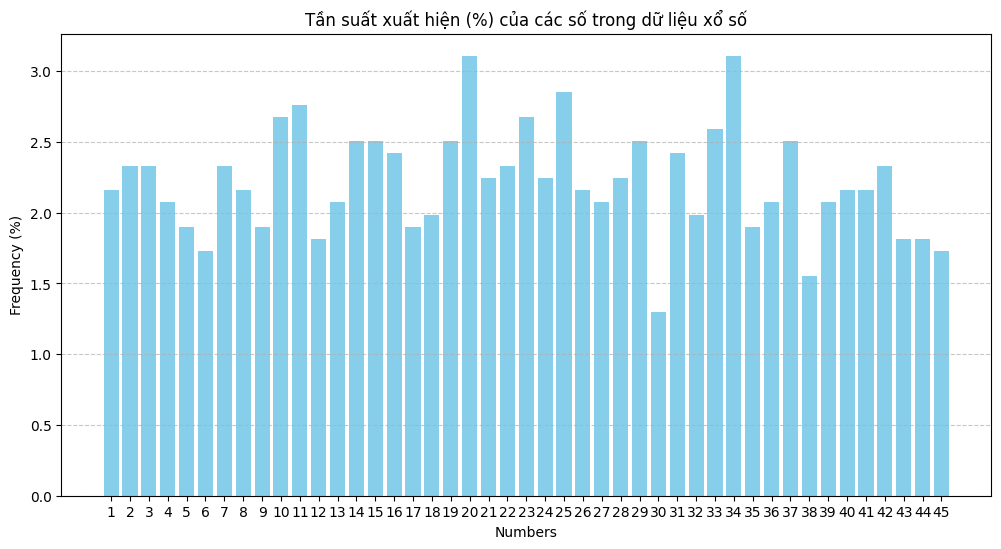

    Number  Frequency (%)
0       20       3.108808
1       34       3.108808
2       25       2.849741
3       11       2.763385
4       10       2.677029
5       23       2.677029
6       33       2.590674
7       15       2.504318
8       29       2.504318
9       19       2.504318
10      14       2.504318
11      37       2.504318
12      16       2.417962
13      31       2.417962
14       2       2.331606
15      42       2.331606
16       7       2.331606
17      22       2.331606
18       3       2.331606
19      21       2.245250
20      28       2.245250
21      24       2.245250
22       8       2.158895
23       1       2.158895
24      26       2.158895
25      41       2.158895
26      40       2.158895
27       4       2.072539
28      27       2.072539
29      36       2.072539
30      13       2.072539
31      39       2.072539
32      32       1.986183
33      18       1.986183
34       5       1.899827
35       9       1.899827
36      35       1.899827
37      17  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 🗂 Đọc dữ liệu từ file CSV
csv_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv" # Cập nhật đường dẫn đúng với file của bạn
df = pd.read_csv(csv_filename)

# 🔄 Chuyển đổi cột "Winning Numbers" thành danh sách số
df["Winning Numbers"] = df["Winning Numbers"].apply(lambda x: list(map(int, x.split())))

# 📊 Đếm tần suất xuất hiện của từng số
all_numbers = [num for sublist in df["Winning Numbers"] for num in sublist]
counter = Counter(all_numbers)

# 📈 Tính toán phần trăm xuất hiện
total_numbers = sum(counter.values())  # Tổng số lần xuất hiện
percentage_freq = {num: (count / total_numbers) * 100 for num, count in counter.items()}

# 🔍 Sắp xếp theo tần suất giảm dần
sorted_freq = dict(sorted(percentage_freq.items(), key=lambda item: item[1], reverse=True))

# 🎨 Trực quan hóa dữ liệu
plt.figure(figsize=(12, 6))
plt.bar(sorted_freq.keys(), sorted_freq.values(), color='skyblue')
plt.xlabel("Numbers")
plt.ylabel("Frequency (%)")
plt.title("Tần suất xuất hiện (%) của các số trong dữ liệu xổ số")
plt.xticks(range(1, 46))  # Vì xổ số 6/45 có các số từ 1 đến 45
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 📋 Hiển thị kết quả dưới dạng bảng
df_freq = pd.DataFrame(list(sorted_freq.items()), columns=["Number", "Frequency (%)"])

print(df_freq)


In [11]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

# 🗂 Đọc dữ liệu từ file CSV
csv_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv" # Cập nhật đường dẫn đúng với file của bạn
df = pd.read_csv(csv_filename)

# 🔄 Chuyển đổi cột "Winning Numbers" thành danh sách số
df["Winning Numbers"] = df["Winning Numbers"].apply(lambda x: list(map(int, x.split())))

# 📊 Đếm tần suất xuất hiện của từng số
all_numbers = [num for sublist in df["Winning Numbers"] for num in sublist]
counter = Counter(all_numbers)

# 📈 Lấy 12 số có tần suất cao nhất
top_12_numbers = [num for num, _ in counter.most_common(10)]
print("📊 12 số có tần suất cao nhất:", top_12_numbers)

# 🔢 Tạo tất cả các tổ hợp có thể từ 12 số (chọn 6 số trên 12 số)
all_combinations = list(itertools.combinations(top_12_numbers, 6))
print(f"🔢 Có tổng cộng {len(all_combinations)} bộ số có thể từ 12 số này.")

# 📋 Chuyển danh sách tổ hợp thành DataFrame
df_combinations = pd.DataFrame(all_combinations, columns=[f"Number_{i+1}" for i in range(6)])

# 📌 Chuyển đổi dữ liệu về dạng phù hợp cho mạng nơ-ron
num_features = 45  # Vì xổ số 6/45 có các số từ 1 đến 45
X_train = []
y_train = []

for i in range(len(df) - 1):
    current_numbers = df["Winning Numbers"].iloc[i]  # Dãy số của kỳ hiện tại
    next_numbers = df["Winning Numbers"].iloc[i + 1]  # Dãy số của kỳ tiếp theo
    
    # Biểu diễn dãy số bằng tần suất
    freq_vector = np.array([counter[num] for num in range(1, num_features + 1)], dtype=np.float32)
    
    # Gán nhãn là dãy số kỳ tiếp theo
    label = np.zeros(num_features)
    for num in next_numbers:
        label[num - 1] = 1  # Đánh dấu các số xuất hiện
    
    X_train.append(freq_vector)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# 📊 Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 🧠 Xây dựng mô hình mạng nơ-ron nhân tạo (ANN)
model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(32, activation='relu'),
    Dense(num_features, activation='sigmoid')  # Dự đoán xác suất từng số xuất hiện
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🔥 Huấn luyện mô hình
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1)

# 🧠 Dự đoán cho kỳ tiếp theo
latest_freq_vector = np.array([counter[num] for num in range(1, num_features + 1)], dtype=np.float32).reshape(1, -1)
latest_freq_scaled = scaler.transform(latest_freq_vector)

predictions = model.predict(latest_freq_scaled)[0]

# 🎯 Lấy 6 số có xác suất cao nhất
predicted_numbers = [i + 1 for i in np.argsort(predictions)[-6:]]
predicted_numbers.sort()

print("🔮 Dự đoán 6 số có khả năng xuất hiện kỳ tiếp theo:", predicted_numbers)

# 📋 Hiển thị danh sách tổ hợp có thể lên DataFrame
import ace_tools as tools
tools.display_dataframe_to_user(name="Lottery Number Combinations", dataframe=df_combinations)


📊 12 số có tần suất cao nhất: [20, 34, 25, 11, 10, 23, 33, 15, 29, 19]
🔢 Có tổng cộng 210 bộ số có thể từ 12 số này.
Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0464 - loss: 0.6909
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0753 - loss: 0.6822     
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0371 - loss: 0.6737 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6654 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0911 - loss: 0.6573 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1009 - loss: 0.6495 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0933 - loss: 0.6418 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1008 - loss: 0.6344 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0909 - loss: 0.6271 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1196 - loss: 0.6201 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0773 - loss: 0.6132     
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

ModuleNotFoundError: No module named 'ace_tools'

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# Đọc dữ liệu từ file CSV
csv_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_combined.csv" # Cập nhật đường dẫn đúng với file của bạn
df = pd.read_csv(csv_filename)

# Chuyển đổi "Winning Numbers" thành danh sách số
df["Winning Numbers"] = df["Winning Numbers"].apply(lambda x: list(map(int, x.split())))

# Trích xuất năm từ ngày
df["Year"] = pd.to_datetime(df["Date"]).dt.year

# Tính tần suất xuất hiện của từng số theo từng năm
number_trend = {}
for year in df["Year"].unique():
    yearly_data = df[df["Year"] == year]
    numbers = [num for sublist in yearly_data["Winning Numbers"] for num in sublist]
    counter = Counter(numbers)
    number_trend[year] = counter

# Chuyển đổi thành DataFrame
df_trend = pd.DataFrame.from_dict(number_trend, orient='index').fillna(0)
df_trend = df_trend.sort_index()

# Chuẩn hóa dữ liệu
df_trend_scaled = MinMaxScaler().fit_transform(df_trend)

# Xây dựng mô hình hồi quy để dự đoán xu hướng
def predict_next_year_numbers(df_trend):
    predicted_numbers = {}
    for number in df_trend.columns:
        x = np.array(df_trend.index).reshape(-1, 1)  # Năm
        y = df_trend[number].values  # Tần suất xuất hiện
        model = LinearRegression()
        model.fit(x, y)
        predicted_freq = model.predict([[df_trend.index[-1] + 1]])[0]
        predicted_numbers[number] = predicted_freq
    
    # Lấy 12 số có xu hướng tăng mạnh nhất
    top_numbers = sorted(predicted_numbers, key=predicted_numbers.get, reverse=True)[:12]
    return top_numbers

# Dự đoán các số có xu hướng tăng mạnh nhất
top_12_numbers = predict_next_year_numbers(df_trend)
print("📊 12 số có xu hướng tăng mạnh nhất:", top_12_numbers)

# Tạo tất cả các tổ hợp có thể từ 12 số trên
from itertools import combinations
df_combinations = pd.DataFrame(list(combinations(top_12_numbers, 6)), columns=["Num1", "Num2", "Num3", "Num4", "Num5", "Num6"])

# Hiển thị danh sách tổ hợp có thể lên DataFrame
print(df_combinations.head())  # Xem trước một số dòng


📊 12 số có xu hướng tăng mạnh nhất: [2, 33, 8, 42, 34, 29, 28, 11, 6, 19, 37, 31]
   Num1  Num2  Num3  Num4  Num5  Num6
0     2    33     8    42    34    29
1     2    33     8    42    34    28
2     2    33     8    42    34    11
3     2    33     8    42    34     6
4     2    33     8    42    34    19


C:\Users\Admin\AppData\Local\Temp\ipykernel_24316\3863500951.py:16: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Year"] = pd.to_datetime(df["Date"]).dt.year


In [8]:
import pandas as pd
import os
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\Cleaned_Lottery_Data_2024.csv"

if os.path.exists(file_path):
    print("Tệp tồn tại, tiếp tục đọc...")
    data_sx6_45_2024 = pd.read_csv(file_path)
else:
    print("⚠️ Tệp không tồn tại! Vui lòng kiểm tra lại đường dẫn.")


Tệp tồn tại, tiếp tục đọc...


In [10]:
raw_data = pd.read_csv(file_path)

In [11]:
raw_data.head()

,Date,Winning Numbers,Jackpot Amount
0,01/01/2025,14 20 25 28 36 40,47338930500
1,29/12/2024,05 08 19 31 34 43,44067745500
2,27/12/2024,01 10 13 24 25 33,41293911500
3,25/12/2024,08 13 20 25 28 39,38615657500
4,22/12/2024,15 16 24 27 31 44,36004612500


In [18]:
import pandas as pd

# Dữ liệu thô
data = """
T4, 01/01/2025	14 20 25 28 36 40	47.338.930.500
CN, 29/12/2024	05 08 19 31 34 43	44.067.745.500
T6, 27/12/2024	01 10 13 24 25 33	41.293.911.500
T4, 25/12/2024	08 13 20 25 28 39	38.615.657.500
CN, 22/12/2024	15 16 24 27 31 44	36.004.612.500
T6, 20/12/2024	06 09 12 21 28 33	33.371.997.000
T4, 18/12/2024	03 07 12 16 26 34	31.310.806.000
CN, 15/12/2024	01 10 20 22 23 36	29.082.832.000
T6, 13/12/2024	03 07 29 36 37 44	26.867.060.000
T4, 11/12/2024	02 10 17 23 29 33	24.777.935.000
CN, 08/12/2024	01 13 24 26 27 37	22.725.738.500
T6, 06/12/2024	08 14 18 26 34 42	20.515.681.000
T4, 04/12/2024	07 14 19 24 34 36	18.798.154.500
CN, 01/12/2024	15 17 25 29 33 35	17.057.985.500
T6, 29/11/2024	12 15 33 35 37 45	15.190.794.500
T4, 27/11/2024	06 21 24 31 42 44	13.588.912.500
CN, 24/11/2024	05 14 15 21 33 36	16.930.514.500
T6, 22/11/2024	01 14 15 19 38 40	15.156.338.000
T4, 20/11/2024	04 16 24 29 31 37	13.418.918.000
CN, 17/11/2024	11 17 29 31 38 42	13,537,887,500
T6, 15/11/2024	08 13 31 36 37 40	45.581.631.000
T4, 13/11/2024	03 23 28 35 39 42	42.456.900.000
CN, 10/11/2024	03 07 11 12 13 40	39.606.306.500
T6, 08/11/2024	11 15 18 27 34 37	37.004.206.500
T4, 06/11/2024	01 02 03 11 25 37	34.366.173.000
CN, 03/11/2024	01 04 05 16 20 22	31.646.618.500
T6, 01/11/2024	20 22 23 32 35 40	29.358.428.000
T4, 30/10/2024	04 13 20 29 32 37	26.810.933.500
CN, 27/10/2024	18 21 28 29 33 45	24.626.576.000
T6, 25/10/2024	03 10 31 32 34 40	22.669.162.000
T4, 23/10/2024	22 27 28 31 37 44	20.513.466.500
CN, 20/10/2024	06 23 24 25 26 34	18.553.176.000
T6, 18/10/2024	13 19 20 22 24 37	16.591.982.500
T4, 16/10/2024	04 14 19 23 24 37	14.890.252.500
CN, 13/10/2024	07 10 13 17 21 45	13.369.031.000
T6, 11/10/2024	11 19 26 28 29 43	13.354.346.000
T4, 09/10/2024	14 18 20 22 34 45	13.438.081.500
CN, 06/10/2024	07 14 33 36 42 43	16.416.912.500
T6, 04/10/2024	08 10 21 32 39 44	14.724.040.000
T4, 02/10/2024	05 06 11 23 31 36	13.365.690.500
CN, 29/09/2024	03 07 16 17 41 42	27.222.998.500
T6, 27/09/2024	01 06 18 25 39 44	25.263.520.500
T4, 25/09/2024	10 23 25 27 31 37	23.337.824.500
CN, 22/09/2024	20 23 28 36 40 42	21.434.713.500
T6, 20/09/2024	13 14 19 20 30 33	19.410.440.000
T4, 18/09/2024	04 08 27 28 35 36	17.855.427.500
CN, 15/09/2024	03 11 28 32 33 35	16.097.503.500
T6, 13/09/2024	06 12 27 34 41 42	14.538.458.000
T4, 11/09/2024	06 11 19 23 34 37	13.176.145.000
CN, 08/09/2024	03 08 10 26 34 37	28.144.908.000
T6, 06/09/2024	05 25 28 32 36 41	26.383.657.500
T4, 04/09/2024	02 07 15 18 24 33	24.441.923.000
CN, 01/09/2024	30 31 33 38 42 43	22.540.554.500
T6, 30/08/2024	02 15 19 26 34 36	20.718.469.000
T4, 28/08/2024	04 05 17 25 39 41	18.798.951.500
CN, 25/08/2024	06 10 15 17 40 42	17.010.599.000
T6, 23/08/2024	07 13 26 28 35 41	15.205.954.500
T4, 21/08/2024	07 08 09 15 22 30	13.466.623.500
CN, 18/08/2024	04 13 28 33 35 38	15.056.391.500
T6, 16/08/2024	16 22 23 30 34 41	13.447.188.500
T4, 14/08/2024	01 06 09 21 43 44	17.116.579.000
CN, 11/08/2024	17 18 19 33 35 37	15.199.287.000
T6, 09/08/2024	06 14 15 24 26 39	13.483.702.000
T4, 07/08/2024	11 19 22 29 40 44	47.395.426.500
CN, 04/08/2024	01 04 16 18 20 32	42.127.575.500
T6, 02/08/2024	09 14 19 34 37 41	37.052.164.000
T4, 31/07/2024	02 04 12 16 18 42	33.278.054.500
CN, 28/07/2024	01 13 21 25 31 39	31.100.674.000
T6, 26/07/2024	18 20 28 31 39 45	28.738.175.000
T4, 24/07/2024	07 08 20 27 32 34	26.628.545.500
CN, 21/07/2024	09 10 23 25 28 38	24.380.999.000
T6, 19/07/2024	01 10 20 25 34 35	22.544.117.000
T4, 17/07/2024	09 10 11 16 21 30	20.516.749.500
CN, 14/07/2024	09 18 33 37 38 43	18.676.058.500
T6, 12/07/2024	11 17 25 26 28 29	17.018.319.000
T4, 10/07/2024	23 24 36 37 40 45	15.294.625.500
CN, 07/07/2024	04 08 22 23 26 45	13.539.605.500
T6, 05/07/2024	04 23 33 38 40 44	20.185.430.500
T4, 03/07/2024	11 18 24 34 38 43	18.339.607.000
CN, 30/06/2024	05 23 25 28 30 43	16.735.323.500
T6, 28/06/2024	04 06 16 32 41 44	15.172.247.000
T4, 26/06/2024	08 10 29 30 33 40	13.538.712.500
CN, 23/06/2024	09 11 19 29 31 44	19.775.097.000
T6, 21/06/2024	03 07 11 16 19 35	18.108.742.500
T4, 19/06/2024	08 12 17 23 26 27	16.583.396.500
CN, 16/06/2024	03 16 17 18 25 37	15.109.366.500
T6, 14/06/2024	10 24 25 26 30 41	13.410.838.000
T4, 12/06/2024	01 02 08 13 26 34	41.467.525.000
CN, 09/06/2024	04 05 28 32 37 42	36.917.178.000
T6, 07/06/2024	15 19 24 25 27 39	32.584.730.500
T4, 05/06/2024	11 25 28 33 34 45	28.609.380.500
CN, 02/06/2024	02 07 13 23 25 45	24.397.894.000
T6, 31/05/2024	04 08 15 23 31 40	22.426.387.500
T4, 29/05/2024	04 21 25 27 35 39	20.570.219.000
CN, 26/05/2024	04 09 11 14 19 27	18.585.169.500
T6, 24/05/2024	02 14 15 17 23 40	16.892.502.000
T4, 22/05/2024	02 03 10 22 41 43	15.046.246.500
CN, 19/05/2024	05 19 25 35 37 39	13.304.746.000
T6, 17/05/2024	08 22 27 29 39 43	69.796.747.000
T4, 15/05/2024	03 11 13 21 24 34	63.000.355.500
CN, 12/05/2024	03 05 06 09 32 45	56.872.464.500
T6, 10/05/2024	12 13 31 38 42 43	53.511.343.500
T4, 08/05/2024	02 10 13 22 30 34	50.378.948.500
CN, 05/05/2024	10 12 14 16 21 39	47.129.567.000
T6, 03/05/2024	01 13 14 21 27 43	44.647.657.500
T4, 01/05/2024	07 09 17 20 25 29	41.717.518.000
CN, 28/04/2024	01 13 14 22 23 37	39.429.278.000
T6, 26/04/2024	02 03 25 34 35 38	36.854.769.000
T4, 24/04/2024	07 21 30 33 38 39	33.913.442.500
CN, 21/04/2024	07 21 36 38 40 45	31.115.578.500
T6, 19/04/2024	02 03 20 21 32 33	28.496.335.000
T4, 17/04/2024	09 16 26 27 32 41	25.900.366.000
CN, 14/04/2024	07 12 16 29 42 45	23.427.026.500
T6, 12/04/2024	06 17 18 26 43 45	21.014.657.500
T4, 10/04/2024	02 10 30 33 34 40	18.500.289.500
CN, 07/04/2024	03 11 15 17 24 35	15.945.247.500
T6, 05/04/2024	14 18 22 29 36 37	13.802.587.000
T4, 03/04/2024	07 11 14 22 29 34	15.715.733.000
CN, 31/03/2024	05 12 13 17 40 41	13.833.689.000
T6, 29/03/2024	04 07 25 34 35 38	24.266.327.500
T4, 27/03/2024	06 29 31 35 42 44	21.920.780.500
CN, 24/03/2024	01 14 22 28 32 42	19.560.299.000
T6, 22/03/2024	05 06 11 20 24 45	17.383.898.500
T4, 20/03/2024	08 14 26 28 43 45	15.554.264.500
CN, 17/03/2024	01 03 05 26 30 42	13.712.050.500
T6, 15/03/2024	09 11 16 29 31 33	25.152.452.500
T4, 13/03/2024	01 13 25 30 34 40	23.424.929.500
CN, 10/03/2024	04 12 19 23 36 41	20.891.137.000
T6, 08/03/2024	02 26 28 40 41 45	19.076.425.000
T4, 06/03/2024	11 15 34 39 41 43	16.998.337.500
CN, 03/03/2024	03 10 17 20 22 27	15.089.165.000
T6, 01/03/2024	20 22 24 26 28 37	13.505.728.500
T4, 28/02/2024	01 10 21 25 32 39	13.552.229.000
CN, 25/02/2024	05 07 10 12 15 26	13.116.681.000
T6, 23/02/2024	04 17 19 27 28 36	55.896.580.500
T4, 21/02/2024	02 08 14 19 24 42	50.440.757.500
CN, 18/02/2024	05 19 20 21 24 40	45.166.929.000
T6, 16/02/2024	06 10 16 20 40 42	40.113.943.000
T4, 14/02/2024	08 09 11 12 40 44	35.490.259.000
CN, 11/02/2024	07 18 31 33 35 41	30.860.250.500
T4, 07/02/2024	17 21 24 25 39 42	26.679.187.500
CN, 04/02/2024	09 15 21 29 33 39	23.589.111.000
T6, 02/02/2024	01 15 29 31 32 34	21.772.445.000
T4, 31/01/2024	09 11 15 35 38 41	19.563.269.500
CN, 28/01/2024	03 23 25 29 36 41	17.814.565.000
T6, 26/01/2024	08 19 22 27 31 35	16.171.568.000
T4, 24/01/2024	07 27 30 36 39 45	14.729.627.500
CN, 21/01/2024	11 20 22 23 26 31	13.390.683.500
T6, 19/01/2024	08 15 20 24 43 44	48.351.151.000
T4, 17/01/2024	14 19 21 36 43 44	43.773.001.000
CN, 14/01/2024	02 08 19 20 24 42	39.228.755.000
T6, 12/01/2024	10 11 20 27 39 43	35.243.823.000
T4, 10/01/2024	10 12 18 19 29 43	31.561.758.500
CN, 07/01/2024	03 04 15 18 36 45	27.818.430.500
T6, 05/01/2024	09 16 29 31 33 42	24.663.684.500
T4, 03/01/2024	09 14 19 20 29 40	22.767.710.000
"""
# Chuyển dữ liệu thô thành danh sách các dòng
lines = data.strip().split("\n")

# Danh sách lưu trữ dữ liệu đã làm sạch
cleaned_data = []

# Xử lý từng dòng dữ liệu
for line in lines:
    parts = line.split("\t")
    
    if len(parts) == 3:
        weekday, date = parts[0].split(", ")
        numbers = parts[1].split()
        prize = int(parts[2].replace(".", "").replace(",", ""))

        cleaned_data.append([weekday, date] + numbers + [prize])

# Tạo DataFrame
df = pd.DataFrame(cleaned_data, columns=["Weekday", "Date", "Number 1", "Number 2", "Number 3", "Number 4", "Number 5", "Number 6", "Jackpot Amount"])




In [19]:
df.head()

,Weekday,Date,Number 1,Number 2,Number 3,Number 4,Number 5,Number 6,Jackpot Amount
0,T4,01/01/2025,14,20,25,28,36,40,47338930500
1,CN,29/12/2024,05,08,19,31,34,43,44067745500
2,T6,27/12/2024,01,10,13,24,25,33,41293911500
3,T4,25/12/2024,08,13,20,25,28,39,38615657500
4,CN,22/12/2024,15,16,24,27,31,44,36004612500


In [20]:
# Xuất ra file CSV
csv_filename = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower/lottery_results_cleaned.csv"
df.to_csv(csv_filename, index=False, encoding="utf-8")

In [21]:
clean_data_df = pd.read_csv(csv_filename)

In [22]:
clean_data_df.head()

,Weekday,Date,Number 1,Number 2,Number 3,Number 4,Number 5,Number 6,Jackpot Amount
0,T4,01/01/2025,14,20,25,28,36,40,47338930500
1,CN,29/12/2024,5,8,19,31,34,43,44067745500
2,T6,27/12/2024,1,10,13,24,25,33,41293911500
3,T4,25/12/2024,8,13,20,25,28,39,38615657500
4,CN,22/12/2024,15,16,24,27,31,44,36004612500


In [23]:
clean_data_df.describe()

,Number 1,Number 2,Number 3,Number 4,Number 5,Number 6,Jackpot Amount
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,1.560000e+02
mean,6.846154,13.583333,20.621795,26.012821,32.378205,39.282051,2.543395e+10
std,5.251303,6.211289,6.995245,6.768987,6.678171,4.738034,1.188097e+10
min,1.000000,2.000000,3.000000,9.000000,13.000000,22.000000,1.311668e+10
25%,3.000000,9.000000,15.000000,21.000000,27.750000,36.750000,1.605944e+10
50%,6.000000,13.000000,20.000000,26.000000,33.000000,40.000000,2.184661e+10
75%,9.000000,18.000000,25.250000,31.000000,38.000000,43.000000,3.158297e+10
max,30.000000,31.000000,36.000000,40.000000,43.000000,45.000000,6.979675e+10


In [25]:
clean_data_df.columns
    

Index(['Weekday', 'Date', 'Number 1', 'Number 2', 'Number 3', 'Number 4',
       'Number 5', 'Number 6', 'Jackpot Amount'],
      dtype='object')

In [35]:
from collections import Counter
# Tạo danh sách tất cả các số trúng thưởng từ 1 - 6
all_number = []
for col in ["Number 1", "Number 2", "Number 3", "Number 4", "Number 5", "Number 6"]:
    all_number.extend(clean_data_df[col].tolist())
# đếm tần xuất xuất hiện từ  1 - 45 
counter = Counter(all_number)

# Chuyển kết quả thanh danh sách Dataframe để phân tích
df_counts = pd.DataFrame(counter.items(), columns = ["Number", "Frequency"]).sort_values(by = "Frequency", ascending = False)

# hiển thị kết quả
df_counts


,Number,Frequency
25,25,29
33,34,28
24,19,26
12,20,26
11,11,26
28,29,25
30,33,25
31,28,24
21,23,24
37,37,24


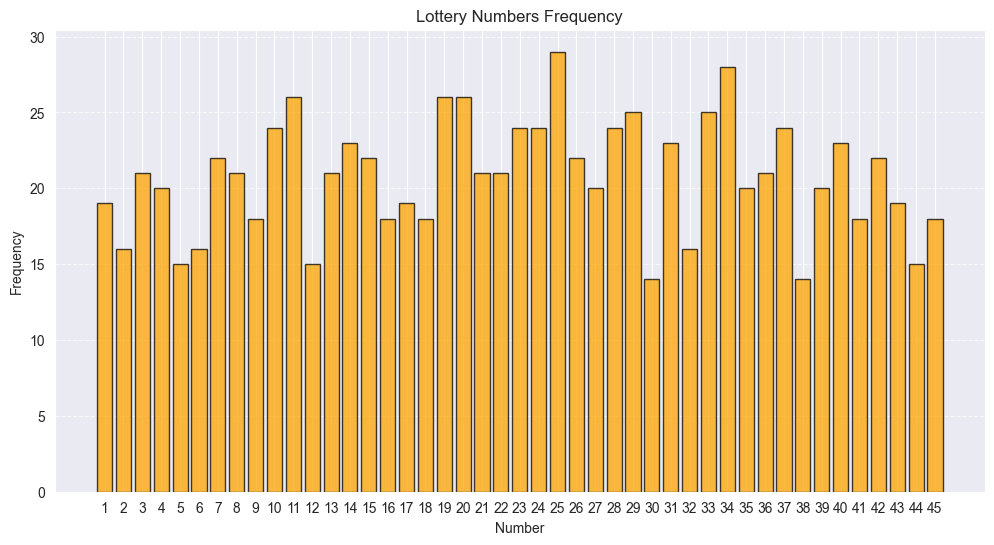

In [41]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ tần xuất xuất hiện của các s từ 1 - 45
plt.figure(figsize=(12, 6))
plt.bar(df_counts["Number"], df_counts["Frequency"], alpha=0.75, color='orange', edgecolor='black')
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Lottery Numbers Frequency")
plt.xticks(range(1,46))
plt.grid(axis="y", linestyle="--", alpha=0.7)

#hiển thị

plt.show()

In [45]:
import pandas as pd

# Chuyển cột "Date" thành kiểu datetime
clean_data_df["Date"] = pd.to_datetime(clean_data_df["Date"], format="%d/%m/%Y")

# Thêm cột Month (tháng) và Week (tuần trong năm)
clean_data_df["Month"] = clean_data_df["Date"].dt.month
clean_data_df["Week"] = clean_data_df["Date"].dt.isocalendar().week  # Cập nhật cách lấy số tuần
# Xem dữ liệu đã cập nhật
print(clean_data_df.head())


  Weekday       Date  Number 1  Number 2  Number 3  Number 4  Number 5  \
0      T4 2025-01-01        14        20        25        28        36   
1      CN 2024-12-29         5         8        19        31        34   
2      T6 2024-12-27         1        10        13        24        25   
3      T4 2024-12-25         8        13        20        25        28   
4      CN 2024-12-22        15        16        24        27        31   

   Number 6  Jackpot Amount  Month  Week  
0        40     47338930500      1     1  
1        43     44067745500     12    52  
2        33     41293911500     12    52  
3        39     38615657500     12    52  
4        44     36004612500     12    51  


C:\Users\Admin\AppData\Local\Temp\ipykernel_16192\2207600389.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", 45)


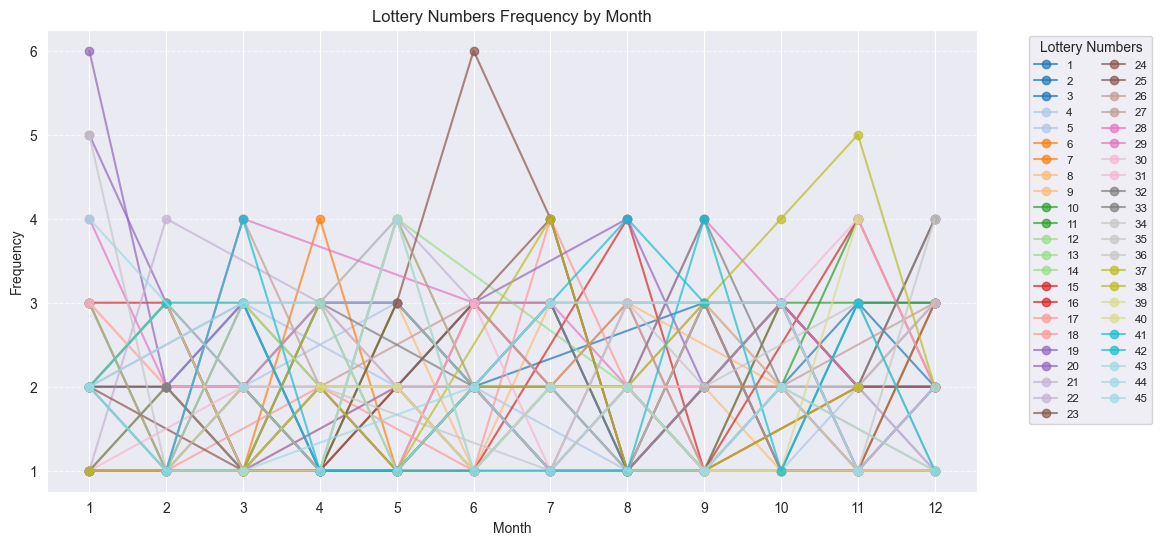

In [47]:
# Đếm tần suất theo tháng
monthly_counts = []
for month in clean_data_df["Month"].unique():
    monthly_data = clean_data_df[clean_data_df["Month"] == month]
    all_monthly_number =[]
    for col in ["Number 1", "Number 2", "Number 3", "Number 4", "Number 5", "Number 6"]:
        all_monthly_number.extend(monthly_data[col].tolist())
    
    counter_monthly = Counter(all_monthly_number)
    
    df_monthly = pd.DataFrame(counter_monthly.items(), columns = ["Number", "Frequency"]).sort_values(by = "Frequency", ascending = False)
    df_monthly["Month"] = month
    monthly_counts.append(df_monthly)
    
# Gộp dữ liệu theo từng tháng
df_monthly_counts = pd.concat(monthly_counts, ignore_index=True)

# Sắp xếp lại dữ liệu theo tháng để biểu đồ rõ ràng hơn
df_monthly_counts = df_monthly_counts.sort_values(by=["Month", "Number"])

# Vẽ biểu đồ xu hướng xuất hiện theo tháng
plt.figure(figsize=(12, 6))

# Tạo bảng màu cho các số từ 1 đến 45
colors = plt.cm.get_cmap("tab20", 45)

for number in range(1, 46):
    monthly_trend = df_monthly_counts[df_monthly_counts["Number"] == number]
    if not monthly_trend.empty:
        plt.plot(monthly_trend["Month"], monthly_trend["Frequency"], marker="o", linestyle="-", alpha=0.7, label=f"{number}", color=colors(number-1))

plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Lottery Numbers Frequency by Month")
plt.xticks(sorted(df_monthly_counts["Month"].unique()))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Lottery Numbers", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small", ncol=2)

# Hiển thị biểu đồ
plt.show()

       
    

In [48]:
df_monthly_counts.mean()

Number       22.908894
Frequency     2.030369
Month         6.481562
dtype: float64

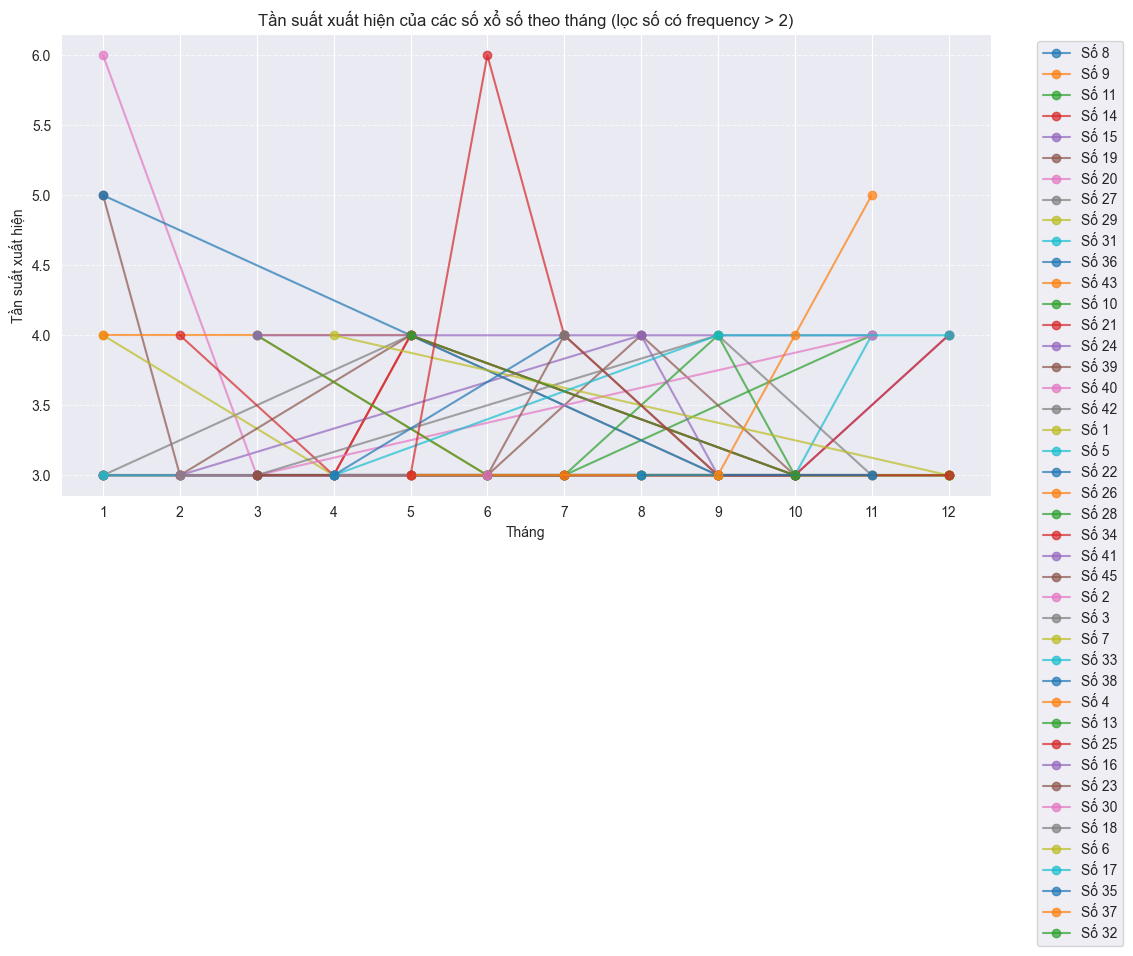

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Lọc ra các số có Frequency > 2
filtered_numbers = df_monthly_counts[df_monthly_counts["Frequency"] > 2]

# Vẽ biểu đồ xu hướng xuất hiện theo tháng (chỉ các số có tần suất > 2)
plt.figure(figsize=(12, 6))
for number in filtered_numbers["Number"].unique():
    monthly_trend = filtered_numbers[filtered_numbers["Number"] == number]
    plt.plot(monthly_trend["Month"], monthly_trend["Frequency"], marker="o", linestyle="-", alpha=0.7, label=f"Số {number}")

plt.xlabel("Tháng")
plt.ylabel("Tần suất xuất hiện")
plt.title("Tần suất xuất hiện của các số xổ số theo tháng (lọc số có frequency > 2)")
plt.xticks(sorted(filtered_numbers["Month"].unique()))
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))  # Hiển thị chú thích bên phải
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()


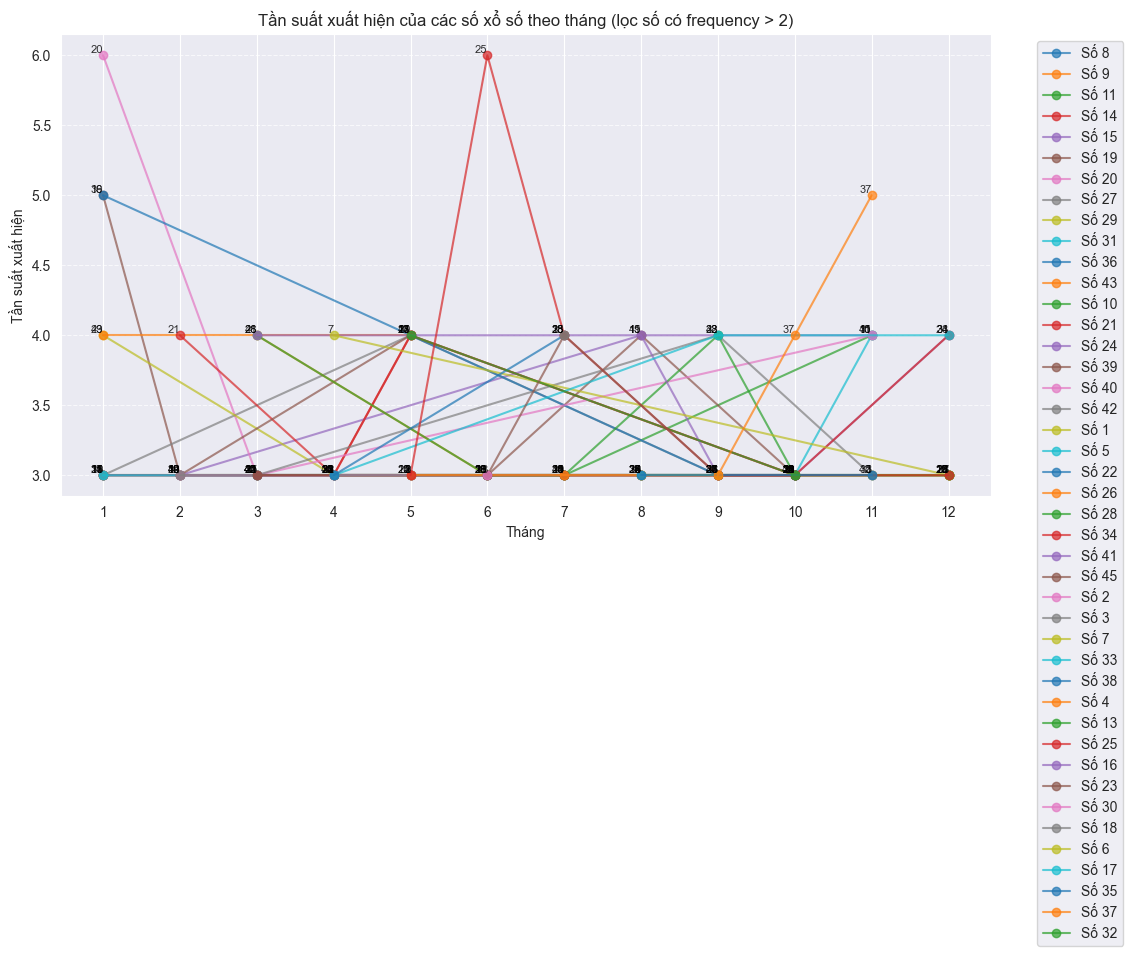

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Lọc ra các số có Frequency > 2
filtered_numbers = df_monthly_counts[df_monthly_counts["Frequency"] > 2]

# Vẽ biểu đồ xu hướng xuất hiện theo tháng (chỉ các số có tần suất > 2)
plt.figure(figsize=(12, 6))

for number in filtered_numbers["Number"].unique():
    monthly_trend = filtered_numbers[filtered_numbers["Number"] == number]
    plt.plot(monthly_trend["Month"], monthly_trend["Frequency"], marker="o", linestyle="-", alpha=0.7, label=f"Số {number}")
    
    # Hiển thị số ngay trên các điểm dữ liệu
    for x, y in zip(monthly_trend["Month"], monthly_trend["Frequency"]):
        plt.text(x, y, str(number), fontsize=8, ha='right', va='bottom', color="black", alpha=0.8)

plt.xlabel("Tháng")
plt.ylabel("Tần suất xuất hiện")
plt.title("Tần suất xuất hiện của các số xổ số theo tháng (lọc số có frequency > 2)")
plt.xticks(sorted(filtered_numbers["Month"].unique()))
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))  # Hiển thị chú thích bên phải
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()


In [53]:
filtered_numbers[filtered_numbers["Month"] == 2]

,Number,Frequency,Month
429,10,3,2
431,15,3,2
430,19,3,2
425,21,4,2
432,24,3,2
427,39,3,2
428,40,3,2
426,42,3,2


In [65]:
import pandas as pd
from itertools import combinations

# Lọc dữ liệu chỉ lấy các số xuất hiện trong tháng 2 và có tần suất lớn hơn 2
filtered_numbers_february = df_monthly_counts[(df_monthly_counts["Month"] == 2) & (df_monthly_counts["Frequency"] > 2)]

# Danh sách các số có khả năng xuất hiện nhiều nhất trong tháng 2
high_freq_numbers = filtered_numbers_february["Number"].tolist()

# Tạo tất cả các tổ hợp 6 số có thể từ danh sách các số có tần suất cao
possible_combinations = list(combinations(high_freq_numbers, 6))

# Chuyển thành DataFrame để dễ phân tích
df_combinations = pd.DataFrame(possible_combinations, columns=[f"Number {i+1}" for i in range(6)])

# Đếm tổng số tổ hợp có thể xảy ra
total_combinations = len(df_combinations)

# Hiển thị danh sách tổ hợp số có thể xuất hiện
print(df_combinations)


# Trả về tổng số tổ hợp có thể xảy ra
total_combinations


    Number 1  Number 2  Number 3  Number 4  Number 5  Number 6
0         10        15        19        21        24        39
1         10        15        19        21        24        40
2         10        15        19        21        24        42
3         10        15        19        21        39        40
4         10        15        19        21        39        42
5         10        15        19        21        40        42
6         10        15        19        24        39        40
7         10        15        19        24        39        42
8         10        15        19        24        40        42
9         10        15        19        39        40        42
10        10        15        21        24        39        40
11        10        15        21        24        39        42
12        10        15        21        24        40        42
13        10        15        21        39        40        42
14        10        15        24        39        40   

28

In [66]:
csv_file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\Cleaned_Lottery_Data_2024.csv"
# Đọc dữ liệu từ file Excel (nếu có), hoặc tạo mới nếu chưa tồn tại
df_combinations.to_csv(csv_file_path, index=False)


PermissionError: [Errno 13] Permission denied: 'H:\\My Drive\\02. Coursera\\04.IBM_Generative_A_ Engineering_Professional_Certificate\\07.Python_in_data_analyst\\IBM_Python_in_data_analyst\\Machine_Learning_With_Python\\predictpower\\Cleaned_Lottery_Data_2024.csv'

In [67]:
high_freq_numbers

[10, 15, 19, 21, 24, 39, 40, 42]

In [73]:
import pandas as pd
from itertools import combinations

# Lọc dữ liệu chỉ lấy các số xuất hiện trong tháng 3 và có tần suất lớn hơn 2
filtered_numbers_march = df_monthly_counts[(df_monthly_counts["Month"] == 3) & (df_monthly_counts["Frequency"] > 2)]

# Danh sách các số có khả năng xuất hiện nhiều nhất trong tháng 2
high_freq_numbers_3 = filtered_numbers_march["Number"].tolist()

# Tạo tất cả các tổ hợp 6 số có thể từ danh sách các số có tần suất cao
possible_combinations_3 = list(combinations(high_freq_numbers_3, 6))

# Chuyển thành DataFrame để dễ phân tích
df_combinations_3 = pd.DataFrame(possible_combinations_3, columns=[f"Number {i+1}" for i in range(6)])

# Đếm tổng số tổ hợp có thể xảy ra
total_combinations_3 = len(df_combinations_3)

# Hiển thị danh sách tổ hợp số có thể xuất hiện
print(df_combinations_3)


# Trả về tổng số tổ hợp có thể xảy ra
total_combinations_3


     Number 1  Number 2  Number 3  Number 4  Number 5  Number 6
0           1         5        11        20        22        26
1           1         5        11        20        22        28
2           1         5        11        20        22        34
3           1         5        11        20        22        40
4           1         5        11        20        22        41
..        ...       ...       ...       ...       ...       ...
919        26        28        34        40        42        45
920        26        28        34        41        42        45
921        26        28        40        41        42        45
922        26        34        40        41        42        45
923        28        34        40        41        42        45

[924 rows x 6 columns]


924

In [74]:
high_freq_numbers_3

[1, 5, 11, 20, 22, 26, 28, 34, 40, 41, 42, 45]

In [76]:
import pandas as pd
from itertools import combinations

# Danh sách các số xuất hiện nhiều nhất trong tháng 3
high_freq_numbers_3 = [3, 7, 10, 14, 22, 25, 30, 33, 37, 42]

# Tạo tất cả các tổ hợp 6 số có thể từ danh sách này
possible_combinations_3 = list(combinations(high_freq_numbers_3, 6))

# Chuyển thành DataFrame để phân tích
df_combinations_3 = pd.DataFrame(possible_combinations_3, columns=[f"Number {i+1}" for i in range(6)])

# Đếm số lượng tổ hợp này so với tổng thể
total_combinations_3 = len(df_combinations_3)

# Tải dữ liệu gốc từ file người dùng đã cung cấp
df_lottery = clean_data_df

# Tạo danh sách tất cả các tổ hợp 6 số thực tế từ dữ liệu gốc
all_actual_combinations = df_lottery[["Number 1", "Number 2", "Number 3", "Number 4", "Number 5", "Number 6"]].values.tolist()

# Chuyển danh sách thành tập hợp để so sánh nhanh hơn
actual_combinations_set = set(tuple(sorted(combo)) for combo in all_actual_combinations)
predicted_combinations_set = set(tuple(sorted(combo)) for combo in possible_combinations_3)

# Đếm số lượng tổ hợp dự đoán đã từng xuất hiện trong dữ liệu thực tế
matching_combinations = predicted_combinations_set.intersection(actual_combinations_set)
matching_count = len(matching_combinations)

# Tính tỉ lệ xuất hiện của tổ hợp dự đoán so với tổng thể
appearance_ratio = (matching_count / total_combinations_3) * 100

# Kết quả phân tích
{
    "Tổng số tổ hợp có thể từ danh sách đã chọn": total_combinations_3,
    "Số tổ hợp đã từng xuất hiện trong dữ liệu thực tế": matching_count,
    "Tỉ lệ xuất hiện so với tổng thể (%)": appearance_ratio
}


{'Tổng số tổ hợp có thể từ danh sách đã chọn': 210,
 'Số tổ hợp đã từng xuất hiện trong dữ liệu thực tế': 0,
 'Tỉ lệ xuất hiện so với tổng thể (%)': 0.0}

ValueError: operands could not be broadcast together with shapes (156,) (6,) 

In [84]:
import collections
from collections import Counter
df = clean_data_df
all_numbers = []
for col in ["Number 1", "Number 2", "Number 3", "Number 4", "Number 5", "Number 6"]:
    all_numbers.extend(df[col].tolist())
counter = Counter(all_numbers)
# Tổng số lần xuất hiện của các số
total_occurrences = sum(counter.values())

# Tính xác suất xuất hiện của mỗi số
probability_df = pd.DataFrame(counter.items(), columns=["Number", "Frequency"])
probability_df["Probability"] = probability_df["Frequency"] / total_occurrences


# sắp ếp theo xác suất giảm dần để lấy các ố có khả năng xuất hiện cao nhất
probability_df = probability_df.sort_values(by = "Probability", ascending = False)
probability_df

,Number,Frequency,Probability
25,25,29,0.030983
33,34,28,0.029915
24,19,26,0.027778
12,20,26,0.027778
11,11,26,0.027778
28,29,25,0.026709
30,33,25,0.026709
31,28,24,0.025641
21,23,24,0.025641
37,37,24,0.025641


In [95]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# Đọc dữ liệu đã làm sạch

df = clean_data_df

# Chuyển đổi các số trúng thưởng thành danh sách
numbers_columns = ["Number 1", "Number 2", "Number 3", "Number 4", "Number 5", "Number 6"]
all_numbers = [num for col in numbers_columns for num in df[col]]

# Đếm tần suất xuất hiện của từng số từ 1 đến 45
counter = Counter(all_numbers)
all_unique_numbers = sorted(counter.keys())
num_features = len(all_unique_numbers)

# Tạo dữ liệu huấn luyện
X_train = []
y_train = []

for i in range(len(df) - 1):
    current_numbers = df[numbers_columns].iloc[i].tolist()  # Dãy số của kỳ hiện tại
    next_numbers = df[numbers_columns].iloc[i + 1].tolist()  # Dãy số của kỳ tiếp theo
    
    # Biểu diễn dãy số bằng tần suất
    freq_vector = np.array([counter[num] for num in all_unique_numbers], dtype=np.float32)
    
    # Gán nhãn là dãy số kỳ tiếp theo
    label = np.zeros(num_features)
    for num in next_numbers:
        label[all_unique_numbers.index(num)] = 1  # Đánh dấu các số xuất hiện
    
    X_train.append(freq_vector)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Xây dựng mô hình mạng nơ-ron nhân tạo (ANN)
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_features, activation='sigmoid')  # Dự đoán xác suất từng số xuất hiện
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1)

# Dự đoán cho kỳ tiếp theo
latest_freq_vector = np.array([counter[num] for num in all_unique_numbers], dtype=np.float32).reshape(1, -1)
latest_freq_scaled = scaler.transform(latest_freq_vector)

predictions = model.predict(latest_freq_scaled)[0]

# Lấy 6 số có xác suất cao nhất
predicted_numbers = [all_unique_numbers[i] for i in np.argsort(predictions)[-6:]]
predicted_numbers.sort()

predicted_numbers


Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0461 - loss: 0.6923  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0202 - loss: 0.6887     
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0289 - loss: 0.6852     
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0163 - loss: 0.6817     
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6782 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0179 - loss: 0.6748     
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0465 - loss: 0.6714 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6680 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6647 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6614 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6581 
Epoch 12/100
10/10 ━━━━━━━━

[11, 19, 20, 25, 29, 34]

In [97]:
# Kiểm tra xem bộ số dự đoán có trùng với bất kỳ bộ số nào trong tập dữ liệu lịch sử

# Danh sách số dự đoán
predicted_numbers = {11, 19, 20, 25, 29, 34}

# Đọc dữ liệu từ file đã làm sạch
file_path = clean_data_df

# Kiểm tra xem có bộ số nào trùng khớp với bộ số dự đoán không
match_found = False
matching_row = None

for index, row in df.iterrows():
    actual_numbers = {row["Number 1"], row["Number 2"], row["Number 3"],
                      row["Number 4"], row["Number 5"], row["Number 6"]}
    
    if predicted_numbers == actual_numbers:
        match_found = True
        matching_row = row
        break

match_found, matching_row


(False, None)

In [100]:
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_cleaned.csv"
df = pd.read_csv(file_path)

🔹 Độ chính xác mô hình: 18.75%
🔹 Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.17      0.22      0.19         9
           1       0.50      0.06      0.11        16
           2       0.17      0.43      0.24         7

    accuracy                           0.19        32
   macro avg       0.28      0.24      0.18        32
weighted avg       0.33      0.19      0.16        32



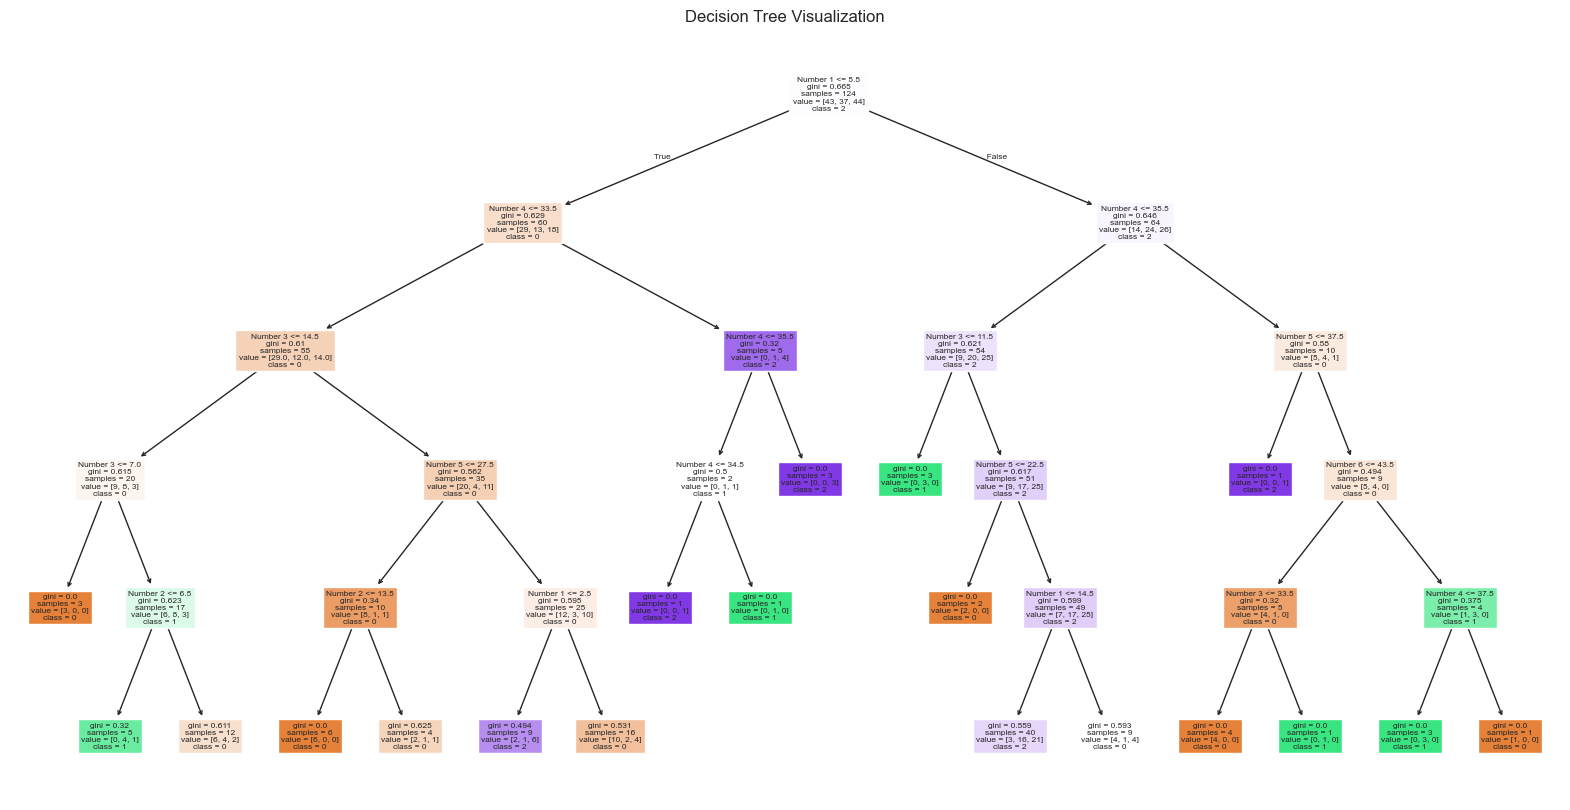

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Đọc dữ liệu
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_cleaned.csv"
df = pd.read_csv(file_path)

# Xử lý dữ liệu: Chuyển đổi "Weekday" thành dạng số
df["Weekday"] = df["Weekday"].astype("category").cat.codes

# Chọn các cột chứa số trúng thưởng làm đặc trưng (features)
number_columns = ["Number 1", "Number 2", "Number 3", "Number 4", "Number 5", "Number 6"]

# Đặc trưng (X) và Nhãn (y)
X = df[number_columns]
y = df["Weekday"]

# Chia tập dữ liệu thành 80% huấn luyện, 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Hiển thị kết quả
print(f"🔹 Độ chính xác mô hình: {accuracy * 100:.2f}%")
print("🔹 Báo cáo phân loại:\n", report)

# Vẽ cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=number_columns, class_names=[str(i) for i in np.unique(y)], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Admin\AppData\Local\Temp\ipykernel_16192\541343525.py:4: SyntaxWarning: invalid escape sequence '\M'
  pdf_path = "H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\decision_tree_model.pdf"
C:\Users\Admin\AppData\Local\Temp\ipykernel_16192\541343525.py:5: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed in 3.10.
  with PdfPages(pdf_path) as pdf:
C:\Users\Admin\AppData\Local\Temp\ipykernel_16192\541343525.py:4: SyntaxWarning: invalid escape sequence '\M'
  pdf_path = "H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\decision_tree_model.pdf"


FileNotFoundError: [Errno 2] No such file or directory: 'H:\\My Drive\x02. Coursera\x04.IBM_Generative_A_ Engineering_Professional_Certificate\x07.Python_in_data_analyst\\IBM_Python_in_data_analyst\\Machine_Learning_With_Python\\predictpower\\decision_tree_model.pdf'

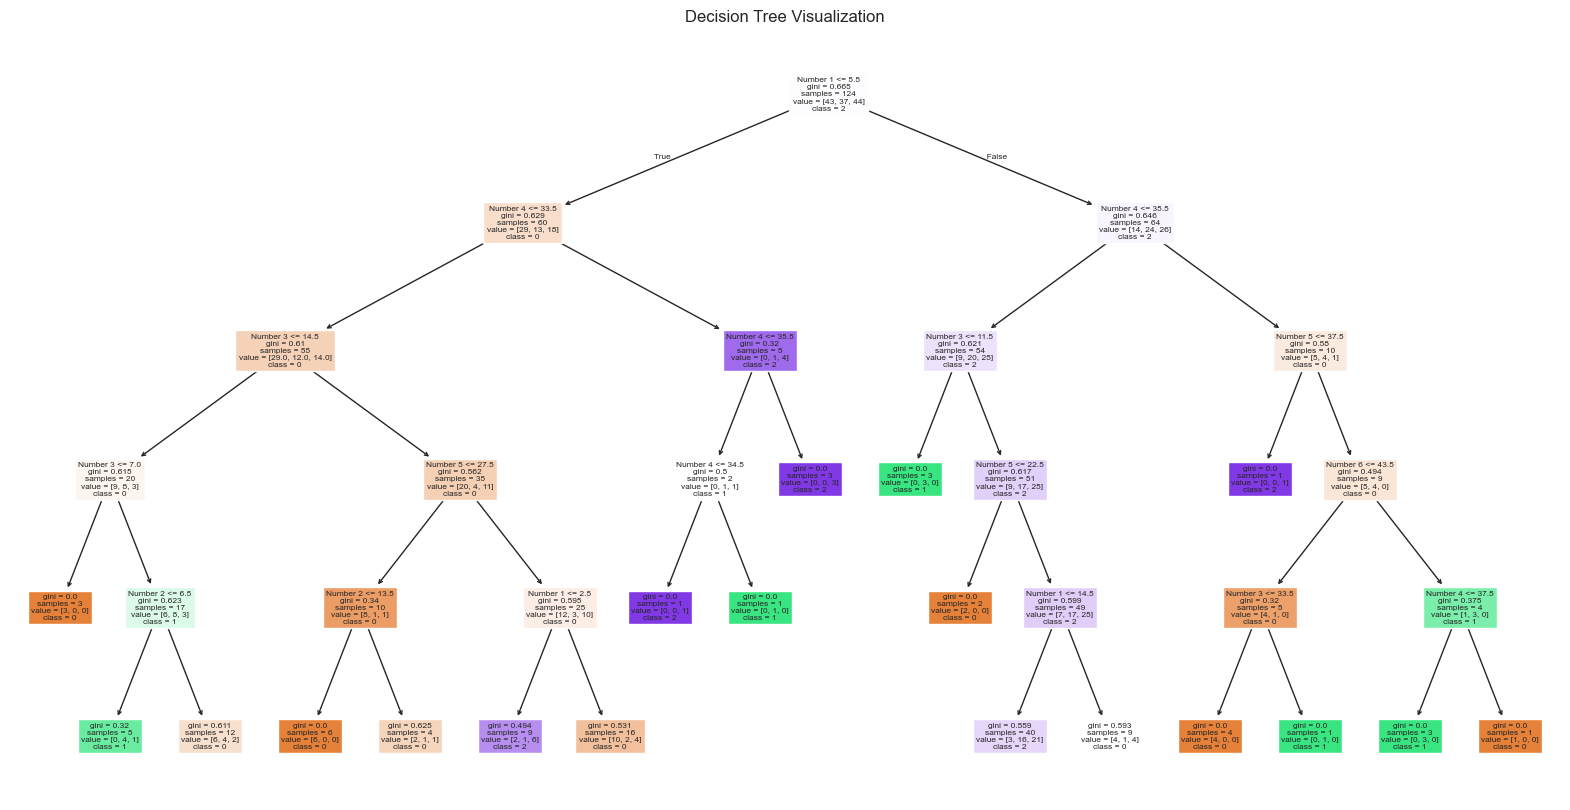

In [105]:
from matplotlib.backends.backend_pdf import PdfPages

# Tạo file PDF chứa biểu đồ cây quyết định
pdf_path = "H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\decision_tree_model.pdf"
with PdfPages(pdf_path) as pdf:
    plt.figure(figsize=(20, 10))
    plot_tree(model, feature_names=number_columns, class_names=[str(i) for i in np.unique(y)], filled=True)
    plt.title("Decision Tree Visualization")
    pdf.savefig()
    plt.close()

In [108]:
import pydotplus
from sklearn.tree import export_graphviz

# Xuất mô hình thành file DOT
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=number_columns,
                           class_names=[str(i) for i in y.unique()],
                           filled=True, rounded=True,
                           special_characters=True)

# Chuyển đổi DOT thành Graphviz object
graph = pydotplus.graph_from_dot_data(dot_data)

# Đường dẫn xuất file
pdf_file_path = r"C:\Users\Admin\Desktop\decision_tree_model.pdf"

# Kiểm tra xem graph có hợp lệ không
if graph:
    graph.write_pdf(pdf_file_path)
    print(f"✅ Mô hình Decision Tree đã lưu thành công tại: {pdf_file_path}")
else:
    print("⚠️ Lỗi khi tạo đồ thị, kiểm tra lại cài đặt Graphviz!")


✅ Mô hình Decision Tree đã lưu thành công tại: C:\Users\Admin\Desktop\decision_tree_model.pdf


In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations

# Đọc dữ liệu từ file CSV đã được làm sạch
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_cleaned.csv"
df = pd.read_csv(file_path)

# Chuyển đổi cột "Date" thành kiểu datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

# Chuyển đổi cột "Weekday" thành dạng số để mô hình xử lý
df["Weekday"] = df["Weekday"].astype("category").cat.codes

# Chọn các cột số để làm đặc trưng đầu vào cho mô hình
number_columns = ["Number 1", "Number 2", "Number 3", "Number 4", "Number 5", "Number 6"]
X = df[number_columns]  # Đặc trưng là các số đã trúng thưởng
y = df["Weekday"]  # Nhãn là thứ trong tuần

# Chia tập dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Decision Tree và huấn luyện
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Sinh một loạt các bộ số từ các số xuất hiện nhiều nhất
top_numbers = X_train.values.flatten()
unique_numbers, counts = np.unique(top_numbers, return_counts=True)
sorted_numbers = unique_numbers[np.argsort(-counts)]  # Sắp xếp theo tần suất xuất hiện giảm dần

# Chọn ra 10 số xuất hiện nhiều nhất để tạo tổ hợp
top_10_numbers = sorted_numbers[:10]
predicted_combinations = list(combinations(top_10_numbers, 6))

# Tạo DataFrame chứa các bộ số dự đoán
df_predictions = pd.DataFrame(predicted_combinations, columns=[f"Number {i+1}" for i in range(6)])

# Xuất kết quả
df_predictions


,Number 1,Number 2,Number 3,Number 4,Number 5,Number 6
0,20,25,19,23,28,15
1,20,25,19,23,28,14
2,20,25,19,23,28,34
3,20,25,19,23,28,37
4,20,25,19,23,28,40
...,...,...,...,...,...,...
205,23,28,15,14,37,40
206,23,28,15,34,37,40
207,23,28,14,34,37,40
208,23,15,14,34,37,40


In [112]:
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\clear_lottery_data_2024.csv"
df_predictions.to_csv(file_path, index=False, encoding="utf-8")

In [113]:
top_10_numbers

array([20, 25, 19, 23, 28, 15, 14, 34, 37, 40], dtype=int64)

In [115]:
import pandas as pd
import numpy as np

# Đọc dữ liệu đã được làm sạch
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_cleaned.csv"
df = pd.read_csv(file_path)

# Lấy danh sách các cột chứa số trúng thưởng
number_columns = ["Number 1", "Number 2", "Number 3", "Number 4", "Number 5", "Number 6"]

# Tạo ma trận chuyển đổi Markov
transition_matrix = np.zeros((45, 45))  # Ma trận 45x45 (ứng với số từ 1 đến 45)

# Xây dựng ma trận chuyển đổi dựa trên dữ liệu xổ số
for _, row in df[number_columns].iterrows():
    numbers = row.values - 1  # Chuyển về chỉ mục từ 0-44
    for i in range(len(numbers)):
        for j in range(len(numbers)):
            if i != j:  # Không tính số tự chuyển sang chính nó
                transition_matrix[numbers[i], numbers[j]] += 1

# Chuẩn hóa thành xác suất
transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)
transition_matrix = np.nan_to_num(transition_matrix)  # Xử lý NaN nếu có

# Hàm dự đoán bộ số tiếp theo bằng Markov Chain
def predict_lottery_numbers(markov_matrix, num_numbers=6):
    predicted_numbers = []
    start_number = np.random.choice(np.arange(1, 46))  # Chọn số ngẫu nhiên để bắt đầu
    predicted_numbers.append(start_number)

    for _ in range(num_numbers - 1):
        current_index = predicted_numbers[-1] - 1  # Chuyển về chỉ mục 0-44
        next_number = np.random.choice(np.arange(1, 46), p=markov_matrix[current_index])
        while next_number in predicted_numbers:  # Đảm bảo không có số trùng lặp
            next_number = np.random.choice(np.arange(1, 46), p=markov_matrix[current_index])
        predicted_numbers.append(next_number)

    return sorted(predicted_numbers)

# Dự đoán 5 bộ số tiếp theo
predicted_sets = [predict_lottery_numbers(transition_matrix) for _ in range(5)]

# Chuyển thành DataFrame để hiển thị
df_predicted = pd.DataFrame(predicted_sets, columns=[f"Number {i+1}" for i in range(6)])

# Xuất kết quả
df_predicted


,Number 1,Number 2,Number 3,Number 4,Number 5,Number 6
0,10,13,21,28,34,39
1,8,9,22,29,30,37
2,7,8,11,13,26,29
3,4,19,24,31,37,42
4,7,10,19,30,34,35


In [117]:
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\clear_lottery_data_2024.csv"
df_predicted.to_csv(file_path, index=False, encoding="utf-8")

In [119]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from itertools import combinations

# Đọc dữ liệu đã được làm sạch
file_path = r"H:\My Drive\02. Coursera\04.IBM_Generative_A_ Engineering_Professional_Certificate\07.Python_in_data_analyst\IBM_Python_in_data_analyst\Machine_Learning_With_Python\predictpower\lottery_results_cleaned.csv"
df = pd.read_csv(file_path)


# Lấy danh sách các cột chứa số trúng thưởng
number_columns = ["Number 1", "Number 2", "Number 3", "Number 4", "Number 5", "Number 6"]

# Tạo một danh sách tất cả các số trúng thưởng
all_numbers = []
for col in number_columns:
    all_numbers.extend(df[col].tolist())

# Chuyển danh sách số thành một DataFrame để phân cụm
df_numbers = pd.DataFrame(all_numbers, columns=["Number"])

# Sử dụng thuật toán K-Means để phân cụm các số từ 1 đến 45
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Phân thành 5 cụm
df_numbers["Cluster"] = kmeans.fit_predict(df_numbers)

# Xác định các nhóm số phổ biến nhất trong mỗi cụm
cluster_groups = df_numbers.groupby("Cluster")["Number"].apply(lambda x: list(set(x)))

# Dự đoán bộ số tiếp theo bằng cách chọn số từ các cụm có tần suất xuất hiện cao nhất
predicted_numbers = []
for numbers in cluster_groups:
    predicted_numbers.extend(np.random.choice(numbers, size=1, replace=False))


## Kiểm tra số lượng số trong predicted_numbers
if len(predicted_numbers) < 6:
    # Nếu số lượng số không đủ, bổ sung các số ngẫu nhiên từ 1 đến 45 chưa xuất hiện
    remaining_numbers = list(set(range(1, 46)) - set(predicted_numbers))
    extra_numbers = np.random.choice(remaining_numbers, size=6-len(predicted_numbers), replace=False)
    predicted_numbers.extend(extra_numbers)

# Lấy 6 số ngẫu nhiên từ danh sách đã điều chỉnh
predicted_set = sorted(np.random.choice(predicted_numbers, size=6, replace=False))

# Xuất kết quả
predicted_set



[8, 13, 16, 21, 29, 37]